In [2]:
import math

In [3]:
import pandas as pd

In [4]:
import pandas as pd

df = pd.read_csv('2023빅콘테스트_어드밴스드리그_예술의전당.csv', header=0, engine='python')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1920868 entries, 0 to 1920867
Data columns (total 24 columns):
 #   Column             Dtype  
---  ------             -----  
 0   age                float64
 1   gender             object 
 2   membership_type_1  object 
 3   membership_type_2  object 
 4   membership_type_3  object 
 5   membership_type_4  object 
 6   membership_type_5  object 
 7   membership_type_6  float64
 8   tran_date          int64  
 9   tran_time          int64  
 10  play_date          int64  
 11  play_st_time       int64  
 12  seat               object 
 13  price              int64  
 14  ticket_cancel      int64  
 15  discount_type      object 
 16  performance_code   int64  
 17  pre_open_date      float64
 18  open_date          float64
 19  genre              object 
 20  place              object 
 21  running_time       int64  
 22  intermission       int64  
 23  member_yn          object 
dtypes: float64(4), int64(9), object(11)
memory usage: 

In [6]:
df['performance_code'].nunique()

2931

# 멤버십 처리하기

In [7]:
# 멤버십 타입별 유니크 파악
unique_6 = df['membership_type_6'].unique()
print(unique_6)

[nan]


In [8]:
## 멤버십 타입1~6 열만 따오기, ## 멤버십 타입6 열 삭제
membership_df = df[['membership_type_1', 'membership_type_2', 'membership_type_3','membership_type_4','membership_type_5']]
membership_df

,membership_type_1,membership_type_2,membership_type_3,membership_type_4,membership_type_5
0,골드,무료,그린,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN
4,무료,NaN,NaN,NaN,NaN
...,...,...,...,...,...
1920863,NaN,NaN,NaN,NaN,NaN
1920864,무료,싹틔우미,NaN,NaN,NaN
1920865,블루,무료,그린,NaN,NaN
1920866,NaN,NaN,NaN,NaN,NaN


In [9]:
import pandas as pd 

pd.set_option('mode.chained_assignment',  None) # 경고 off

In [10]:
## MS 새로운 열 추가
membership_df['MS'] = 'm'
membership_df.head()

,membership_type_1,membership_type_2,membership_type_3,membership_type_4,membership_type_5,MS
0,골드,무료,그린,NaN,NaN,m
1,NaN,NaN,NaN,NaN,NaN,m
2,NaN,NaN,NaN,NaN,NaN,m
3,NaN,NaN,NaN,NaN,NaN,m
4,무료,NaN,NaN,NaN,NaN,m


In [11]:
## 타입1 = null -> n으로 변경
membership_df.loc[membership_df['membership_type_1'] != membership_df['membership_type_1'], 'membership_type_1'] = 'n'
membership_df

,membership_type_1,membership_type_2,membership_type_3,membership_type_4,membership_type_5,MS
0,골드,무료,그린,NaN,NaN,m
1,n,NaN,NaN,NaN,NaN,m
2,n,NaN,NaN,NaN,NaN,m
3,n,NaN,NaN,NaN,NaN,m
4,무료,NaN,NaN,NaN,NaN,m
...,...,...,...,...,...,...
1920863,n,NaN,NaN,NaN,NaN,m
1920864,무료,싹틔우미,NaN,NaN,NaN,m
1920865,블루,무료,그린,NaN,NaN,m
1920866,n,NaN,NaN,NaN,NaN,m


In [12]:
## n에 해당하는 행들의 MS열의 값을 0으로 변경
import numpy as np
membership_df['MS'] = np.where(membership_df['membership_type_1'] == 'n', 0, 'm')
membership_df

,membership_type_1,membership_type_2,membership_type_3,membership_type_4,membership_type_5,MS
0,골드,무료,그린,NaN,NaN,m
1,n,NaN,NaN,NaN,NaN,0
2,n,NaN,NaN,NaN,NaN,0
3,n,NaN,NaN,NaN,NaN,0
4,무료,NaN,NaN,NaN,NaN,m
...,...,...,...,...,...,...
1920863,n,NaN,NaN,NaN,NaN,0
1920864,무료,싹틔우미,NaN,NaN,NaN,m
1920865,블루,무료,그린,NaN,NaN,m
1920866,n,NaN,NaN,NaN,NaN,0


In [13]:
  #  One-hot encoding 처리

## 6열을 만들고 0 or 1 입력하기

## 각 6열 생성 
m_d = membership_df.copy()

m_d[['무료', '그린', '블루','골드','싹틔우미','노블']] = 0

## 표기하기

 # 블루 먼저
m_d['블루'] = np.where(m_d['membership_type_1'] == '블루', 1, 0)

 # 골드
m_d['골드'] = np.where(m_d['membership_type_1']== '골드', 1, 0)
m_d.loc[m_d['membership_type_2'] == '골드', '골드'] = 1 
    
 # 무료
m_d['무료'] = np.where(m_d['membership_type_1']== '무료', 1, 0)
m_d.loc[m_d['membership_type_2'] == '무료', '무료'] = 1
m_d.loc[m_d['membership_type_3'] == '무료', '무료'] = 1

 # 노블
m_d['노블'] = np.where(m_d['membership_type_2']== '노블', 1, 0)
m_d.loc[m_d['membership_type_3'] == '노블', '노블'] = 1
m_d.loc[m_d['membership_type_4'] == '노블', '노블'] = 1

 # 싹틔우미
m_d['싹틔우미'] = np.where(m_d['membership_type_2']== '싹틔우미', 1, 0)
m_d.loc[m_d['membership_type_3'] == '싹틔우미', '싹틔우미'] = 1
m_d.loc[m_d['membership_type_4'] == '싹틔우미', '싹틔우미'] = 1
   
 #그린
m_d['그린'] = np.where(m_d['membership_type_2']== '그린', 1, 0)
m_d.loc[m_d['membership_type_3'] == '그린', '그린'] = 1
m_d.loc[m_d['membership_type_4'] == '그린', '그린'] = 1
m_d.loc[m_d['membership_type_5'] == '그린', '그린'] = 1

m_d

,membership_type_1,membership_type_2,membership_type_3,membership_type_4,membership_type_5,MS,무료,그린,블루,골드,싹틔우미,노블
0,골드,무료,그린,NaN,NaN,m,1,1,0,1,0,0
1,n,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0
2,n,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0
3,n,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0
4,무료,NaN,NaN,NaN,NaN,m,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1920863,n,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0
1920864,무료,싹틔우미,NaN,NaN,NaN,m,1,0,0,0,1,0
1920865,블루,무료,그린,NaN,NaN,m,1,1,1,0,0,0
1920866,n,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0


In [14]:
# csv 파일 저장
m_b_t = df.copy()
m_b_t[['MS','무료','그린','블루','골드','싹틔우미','노블']] = m_d[['MS','무료','그린','블루','골드','싹틔우미','노블']]
m_b_t

# 좌석 등급 알아내기

In [15]:
### 좌석 알아내기
seat = df[['seat','place']]

seat

,seat,place
0,3층 BOX9 10,콘서트홀
1,1층 7열 5,리사이틀홀
2,1층 C블록 16열 3,IBK챔버홀
3,1층 2열 3,리사이틀홀
4,1층 B블록12열 7,콘서트홀
...,...,...
1920863,1층 A블록 14열 6,IBK챔버홀
1920864,3층 B블록5열 4,콘서트홀
1920865,1층 7열 3,리사이틀홀
1920866,1층 B블록 9열 5,IBK챔버홀


In [16]:
# place별로 분류

unique_place = seat['place'].unique()
print(unique_place)

['콘서트홀' '리사이틀홀' 'IBK챔버홀']


In [17]:
## 좌석등급 유추 2번째 방법

g_data = df[['performance_code','price','discount_type']]

In [18]:
unique_discount= g_data['discount_type'].unique()
print(unique_discount)

['일반' '초대권' '블루회원 할인20%' '골드회원 할인20%' '기획사' 'K-lang 멤버십 회원(1인2매)20%'
 '기획사판매' '골드회원 할인30%' 'R석 기획사 할인' '싹틔우미 할인40%'
 '라흐마니노프탄생150주년(8매/3.27까지)20%' '공연진행석' '골드회원 할인10%' '장애인/국가유공자 할인50%'
 '싹딜가(골드)50%' '당일할인티켓' '그린회원 할인5%' '초,중,고,대학생(본인만)30%' '조기예매 할인40%'
 '그린회원 할인20%' '한화초대석' '단체100인이상50%' '공연예매권' '초/중/고등학생 할인(본인만)30%'
 '골드회원 할인15%' '골드회원 할인25%' '우리카드 우수회원' '조기예매 할인(1인8매/3월11일까지)30%' '신세계석'
 '골드회원 할인5%' '정기회원' '만65세 이상(본인만)50%' '싹딜가(블루)50%' '그린회원 할인15%'
 '직장인 할인(1인2매)20%' '블루회원 할인10%' '기획사판매20%' '초/중/고/대학생 할인(본인만)50%'
 '문화릴레이(1인2매/공연유료티켓제시)10%' '조기예매 할인10%' '노블회원 할인40%' 'K-Lang 할인(1인2매)20%'
 '골드회원 할인40%' '초/중/고등학생 할인(본인만)20%' '조기예매 할인(1인2매/~10월31일까지)30%' '기업석'
 '초/중/고/대학생 할인30%' '초/중/고/대학생 할인50%' '의사상자(동반1인/신분증지참)50%'
 '초,중,고,대학생(본인만)50%' '조기예매할인(1인8매/~6.30까지)30%' '그린회원 할인10%' '블루회원 할인5%'
 '연주자 할인50%' '스탭 할인30%' '홍보진행' 'KOSYMI  유료회원(1인4매)40%'
 '청소년(만7세~만24세/본인만)50%' '청소년(만 24세 이하/본인만)30%' '단체20인이상20%'
 '얼리버드 할인(1인4매/10월31일까지)10%' '패밀리할인(3매이상/1인4매)15%' '싹딜가(그린)60%' 'KT석'
 '조기예매 할인(1인8매/9

In [19]:
## 퍼센트 유무 열 만들기
g_data['per'] = 0

 # 퍼센트 포함된 값 분류
gg_data=g_data.copy()
g_data[g_data['discount_type'].str.contains('%')]
gg_data['per'] = np.where(g_data['discount_type'].str.contains('%'), 1, 0)
gg_data

,performance_code,price,discount_type,per
0,302,10000,일반,0
1,1120,0,초대권,0
2,2283,0,초대권,0
3,2798,0,초대권,0
4,897,180000,일반,0
...,...,...,...,...
1920863,1265,0,초대권,0
1920864,313,21000,청소년(만7세~만24세/본인만)30%,1
1920865,736,24000,그린회원 할인20%,1
1920866,1920,0,초대권,0


In [20]:
## 퍼센트 숫자만 뽑기
gg_data['perc1'] = 0
gg_data['perc1'] = gg_data['discount_type'].str.extract(r'(\d+%)')

gg_data['perc']=0
gg_data['perc'] = gg_data['perc1'].str.extract(r'(\d+)')

gg_data = gg_data.drop(columns=['perc1'])

gg_data

,performance_code,price,discount_type,per,perc
0,302,10000,일반,0,NaN
1,1120,0,초대권,0,NaN
2,2283,0,초대권,0,NaN
3,2798,0,초대권,0,NaN
4,897,180000,일반,0,NaN
...,...,...,...,...,...
1920863,1265,0,초대권,0,NaN
1920864,313,21000,청소년(만7세~만24세/본인만)30%,1,30
1920865,736,24000,그린회원 할인20%,1,20
1920866,1920,0,초대권,0,NaN


In [21]:
gg_data

,performance_code,price,discount_type,per,perc
0,302,10000,일반,0,NaN
1,1120,0,초대권,0,NaN
2,2283,0,초대권,0,NaN
3,2798,0,초대권,0,NaN
4,897,180000,일반,0,NaN
...,...,...,...,...,...
1920863,1265,0,초대권,0,NaN
1920864,313,21000,청소년(만7세~만24세/본인만)30%,1,30
1920865,736,24000,그린회원 할인20%,1,20
1920866,1920,0,초대권,0,NaN


In [22]:
## 원래값 계산

# 원래값 열 만들기
ggg_data = gg_data.copy()
ggg_data

,performance_code,price,discount_type,per,perc
0,302,10000,일반,0,NaN
1,1120,0,초대권,0,NaN
2,2283,0,초대권,0,NaN
3,2798,0,초대권,0,NaN
4,897,180000,일반,0,NaN
...,...,...,...,...,...
1920863,1265,0,초대권,0,NaN
1920864,313,21000,청소년(만7세~만24세/본인만)30%,1,30
1920865,736,24000,그린회원 할인20%,1,20
1920866,1920,0,초대권,0,NaN


In [23]:
# nan = 0 
ggg_data['perc'] = ggg_data['perc'].fillna(0)

# 원가 구하는 함수
ggg_data['perc'] = ggg_data['perc'].astype(int)
ggg_data['discount_rate'] = ggg_data['perc'] / 100

# 'original_price' 열을 만들고 값을 계산하여 넣어줌
ggg_data['original_price'] = ggg_data.apply(lambda row: row['price'] if row['per'] == 0 else row['price'] / (1 - row['discount_rate']), axis=1)


# L 열 삭제
#ggg_data = ggg_data.drop(columns=['per'])

import numpy as np

# 'per' 열이 0인 행들의 'original_price'을 결측치로 바꿈
ggg_data.loc[ggg_data['per'] == 0, 'original_price'] = np.nan

ggg_data

,performance_code,price,discount_type,per,perc,discount_rate,original_price
0,302,10000,일반,0,0,0.0,NaN
1,1120,0,초대권,0,0,0.0,NaN
2,2283,0,초대권,0,0,0.0,NaN
3,2798,0,초대권,0,0,0.0,NaN
4,897,180000,일반,0,0,0.0,NaN
...,...,...,...,...,...,...,...
1920863,1265,0,초대권,0,0,0.0,NaN
1920864,313,21000,청소년(만7세~만24세/본인만)30%,1,30,0.3,30000.0
1920865,736,24000,그린회원 할인20%,1,20,0.2,30000.0
1920866,1920,0,초대권,0,0,0.0,NaN


In [24]:
# 일반 타입인 애들 = 가격 그대로
ggg_data.loc[ggg_data['discount_type'] == '일반', 'original_price'] = ggg_data['price']


In [25]:
# 'original_price'을 천원 단위로 바꾸기
import numpy as np

# 'original_price' 열의 값을 오천 단위로 올림
ggg_data['original_price'] = np.ceil(ggg_data['original_price'] / 5000) * 5000


In [26]:
unique_original_prices = sorted(ggg_data['original_price'].unique())
print(unique_original_prices)


[10000.0, nan, 0.0, 15000.0, 20000.0, 25000.0, 30000.0, 35000.0, 40000.0, 45000.0, 50000.0, 55000.0, 60000.0, 65000.0, 70000.0, 75000.0, 80000.0, 85000.0, 90000.0, 95000.0, 100000.0, 105000.0, 110000.0, 120000.0, 125000.0, 130000.0, 135000.0, 140000.0, 150000.0, 160000.0, 170000.0, 180000.0, 190000.0, 200000.0, 210000.0, 220000.0, 230000.0, 235000.0, 250000.0, 255000.0, 260000.0, 265000.0, 280000.0, 290000.0, 300000.0, 320000.0, 330000.0, 340000.0, 350000.0, 380000.0, 390000.0, 400000.0, 430000.0, 480000.0, 485000.0]


In [53]:
## 좌석 등급 유추하기

# 초대권 or 0원 버리고 & 타입 = 일반
s_d = ggg_data.copy()

s_d = ggg_data[['performance_code','original_price']]
s_d['discount_type'] = ggg_data['discount_type']

s_d = s_d[s_d['discount_type'] == '일반']
s_d= s_d[s_d['original_price'] != 0]

s_d

,performance_code,original_price,discount_type
0,302,10000.0,일반
4,897,180000.0,일반
9,1528,75000.0,일반
13,2344,20000.0,일반
15,2631,120000.0,일반
...,...,...,...
1920838,2206,50000.0,일반
1920843,282,10000.0,일반
1920849,1666,40000.0,일반
1920853,887,90000.0,일반


In [54]:
## 퍼모먼스 코드별로 묶고 가격순으로 정렬

s_dd = s_d.copy()
s_dd = s_d.sort_values(by=['performance_code','original_price'], ascending=True)

s_dd['grade'] = 0
s_dd['gr_uni'] = s_dd.groupby('performance_code')['original_price'].transform('nunique')


s_dd

,performance_code,original_price,discount_type,grade,gr_uni
521670,1,50000.0,일반,0,3
331434,1,60000.0,일반,0,3
660256,1,60000.0,일반,0,3
697917,1,60000.0,일반,0,3
1187715,1,60000.0,일반,0,3
...,...,...,...,...,...
1914840,2938,160000.0,일반,0,4
1916230,2938,160000.0,일반,0,4
1917481,2938,160000.0,일반,0,4
1918305,2938,160000.0,일반,0,4


In [55]:
## 가격 종류 5개 이상인 퍼포먼스 코드 개수

# 해당 퍼모먼스 코드 고유값   2811 => / 가격 종류 개수 -> 1~8개
s_dd.nunique()
s_dd.count()


performance_code    236954
original_price      236954
discount_type       236954
grade               236954
gr_uni              236954
dtype: int64

In [56]:
## 5개 이상인 것만 남기고
s_ddd = s_dd.copy()

s_ddd = s_ddd[s_ddd['gr_uni'] < 5]
s_ddd

## 퍼포먼스 고유값 개수 구하기  -> 156개 / 236954

s_ddd['performance_code'].unique()   # 5개 이상인 퍼포먼스코드 목록
s_ddd['performance_code'].nunique()   # 고유값 개수

2655

In [57]:
s_dd

,performance_code,original_price,discount_type,grade,gr_uni
521670,1,50000.0,일반,0,3
331434,1,60000.0,일반,0,3
660256,1,60000.0,일반,0,3
697917,1,60000.0,일반,0,3
1187715,1,60000.0,일반,0,3
...,...,...,...,...,...
1914840,2938,160000.0,일반,0,4
1916230,2938,160000.0,일반,0,4
1917481,2938,160000.0,일반,0,4
1918305,2938,160000.0,일반,0,4


## 가격 종류 개수 = 1

In [58]:
## 좌석 등급 매기기 s_dd

 # s_dd['gr_uni'] = 1개 
s_dd[s_dd['gr_uni'] ==1]
s_dd.loc[s_dd['gr_uni'] == 1 , 'grade'] = '전체 일반석'

   # 퍼포먼스 고유값 개수 => 1520 개 / 2811
unique_performance_count1 = s_dd[s_dd['gr_uni'] == 1]['performance_code'].nunique()

print(unique_performance_count1)
# s_dd 


1520


## 가격 종류 개수 = 2

In [59]:
# s_dd['gr_uni'] = 2개 -> 2가지 좌석 등급 -> R- 5만원 S- 3만원 (홈페이지 참고)
    
s_dd[s_dd['gr_uni'] ==2]
#s_ddd = s_dd[s_dd['gr_uni'] ==2]

    # 'gr_uni' 값이 2인 행들에 대해서만 'grade' 값을 변경
    
# 'performance_code' 별 최대 'original_price' 값 계산
max_prices = s_dd.groupby('performance_code')['original_price'].transform('max')

# 조건에 따라 'grade' 값을 변경
condition = (s_dd['gr_uni'] == 2) & (s_dd['original_price'] == max_prices)
s_dd.loc[condition, 'grade'] = 'R'
s_dd.loc[condition, 'grade'] = s_dd.loc[condition].apply(lambda row: 'R' if row['original_price'] == max_prices[s_dd['performance_code'] == row['performance_code']].values[0] else 'A', axis=1)
    

#s_ddd['original_price'].unique()

   # = 2 퍼포먼스 고유값 개수 
#unique_performance_count3 = s_dd[s_dd['gr_uni'] == 2]['performance_code'].nunique()

#print(unique_performance_count2)

s_dd 

#s_dd['grade'].unique()
#s_dd[s_dd['performance_code'] ==8]      # 테스트

,performance_code,original_price,discount_type,grade,gr_uni
521670,1,50000.0,일반,0,3
331434,1,60000.0,일반,0,3
660256,1,60000.0,일반,0,3
697917,1,60000.0,일반,0,3
1187715,1,60000.0,일반,0,3
...,...,...,...,...,...
1914840,2938,160000.0,일반,0,4
1916230,2938,160000.0,일반,0,4
1917481,2938,160000.0,일반,0,4
1918305,2938,160000.0,일반,0,4


In [60]:
s_dd.info()

<class 'pandas.core.frame.DataFrame'>
Index: 236954 entries, 521670 to 1918474
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   performance_code  236954 non-null  int64  
 1   original_price    236954 non-null  float64
 2   discount_type     236954 non-null  object 
 3   grade             236954 non-null  object 
 4   gr_uni            236954 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 10.8+ MB


## 가격 종류 개수 = 3 처리

In [61]:
# s_dd['gr_uni'] = 3개    -> 350개

   # 천원 단위인 애들 = 할인 -> 정규화로 분류

    # 등급 새겨주기
filtered_rows = s_dd[s_dd['gr_uni'] == 3].copy()

def change_grade(group):
    if len(group) == 1:
        group['grade'] = 'A'
    else:
        sorted_rows = group.sort_values(by='original_price', ascending=False)
        max_grade_idx = sorted_rows['original_price'].idxmax()
        sorted_rows['grade'] = 'A'
        sorted_rows.at[max_grade_idx, 'grade'] = 'R'
        
        if len(sorted_rows) >= 2:
            second_max_grade_idx = sorted_rows['original_price'].nlargest(2).idxmin()
            sorted_rows.at[second_max_grade_idx, 'grade'] = 'S'
            
            # 중복된 original_price를 가지는 행들에 대한 처리
            same_price_rows = sorted_rows[sorted_rows['original_price'] == sorted_rows.at[second_max_grade_idx, 'original_price']]
            same_price_rows['grade'] = 'S'
            sorted_rows.update(same_price_rows)
        
    return sorted_rows

filtered_rows = filtered_rows.groupby('performance_code', group_keys=False).apply(change_grade)

s_dd.update(filtered_rows)

s_dd

#unique_performance_codes = s_dd[s_dd['gr_uni'] == 3]['original_price'].unique()
#unique_performance_codes3 = s_dd[s_dd['gr_uni'] == 3]['performance_code'].unique()
#print(unique_performance_codes3)

s_dd
#테스트
s_dd[s_dd['performance_code'] ==50] 


,performance_code,original_price,discount_type,grade,gr_uni
26233,50,20000.0,일반,A,3
130438,50,20000.0,일반,A,3
189503,50,20000.0,일반,A,3
238395,50,20000.0,일반,A,3
292639,50,20000.0,일반,A,3
317865,50,20000.0,일반,A,3
327256,50,20000.0,일반,A,3
339242,50,20000.0,일반,A,3
341890,50,20000.0,일반,A,3
389964,50,20000.0,일반,A,3


# 가격 종류 = 4 처리

In [62]:
## 종류 = 4 -> 정규화 파악
unique_o_p = s_dd[s_dd['gr_uni'] == 4]['original_price'].unique()
print(unique_o_p)
unique_performance_codes4 = s_dd[s_dd['gr_uni'] == 4]['performance_code'].unique()
#print(unique_performance_codes4)

s_dd[s_dd['performance_code'] ==303]['original_price'].unique()

[ 30000.  60000.  90000. 120000.  20000.  50000. 100000.  80000.  40000.
 160000.  10000.  70000. 110000. 150000.  55000. 125000. 190000.  15000.
 200000.  35000. 130000. 170000.  45000. 135000. 140000. 180000. 260000.
 250000.  75000. 220000.]


array([ 10000.,  50000.,  90000., 120000.])

In [63]:
s_dd
s_dd.isnull().sum()

performance_code    0
original_price      0
discount_type       0
grade               0
gr_uni              0
dtype: int64

In [64]:
sorted_rows = s_dd[s_dd['gr_uni'] == 4].sort_values(by=['performance_code', 'original_price'], ascending=[True, True])
sorted_rows

unique_o_p = s_dd[s_dd['gr_uni'] == 4]['original_price'].unique()
unique_o_p_sorted = sorted(unique_o_p)
print(unique_o_p_sorted)

[10000.0, 15000.0, 20000.0, 30000.0, 35000.0, 40000.0, 45000.0, 50000.0, 55000.0, 60000.0, 70000.0, 75000.0, 80000.0, 90000.0, 100000.0, 110000.0, 120000.0, 125000.0, 130000.0, 135000.0, 140000.0, 150000.0, 160000.0, 170000.0, 180000.0, 190000.0, 200000.0, 220000.0, 250000.0, 260000.0]


## 가격 종류 개수 = 4 수작업 과정

In [65]:
### 의심되는 가격이 포함된 퍼포먼스 번호 → 따로 수작업 처리
    ## 1. 하나씩 확인하고 할인 영향으로 특이값처럼 보이면 따로 범주화 작업 / 2. 원가 자체가 애매했던거라면 공통작업

 ## 33000원  -> 441 , 873 , 876, 880, 1199, 1231, 1232 -> 수작업 x

 ## 44000원 -> 718, 2604 -> 수작업 x
performance_codes = s_dd[(s_dd['gr_uni'] == 4) & (s_dd['original_price'] == 44000)]['performance_code'].unique()
performance_codes_sorted44 = sorted(performance_codes)
#print(performance_codes_sorted44)

 ## 55000 -> 219, 441, 718, 873, 876, 880, 881, 893, 996, 1199, 1231, 1232, 1400, 1546, 1715, 1716 -> 수작업 x
performance_codes = s_dd[(s_dd['gr_uni'] == 4) & (s_dd['original_price'] == 55000)]['performance_code'].unique()
performance_codes_sorted55 = sorted(performance_codes)
#print(performance_codes_sorted55)

 ## 66000 -> 2604, 2615, 2616 -> 수작업 처리 해줌 -> 완료
performance_codes = s_dd[(s_dd['gr_uni'] == 4) & (s_dd['original_price'] == 66000)]['performance_code'].unique()
performance_codes_sorted66 = sorted(performance_codes)
#print(performance_codes_sorted66)

  # 2604 -> 44000 = A 66000,99000 = S 133000 = R
conditions = [
    (s_dd['gr_uni'] == 4) & (s_dd['performance_code'] == 2604) & (s_dd['original_price'] == 44000),
    (s_dd['gr_uni'] == 4) & (s_dd['performance_code'] == 2604) & (s_dd['original_price'].isin([66000, 99000])),
    (s_dd['gr_uni'] == 4) & (s_dd['performance_code'] == 2604) & (s_dd['original_price'] == 133000)
]

choices = ['A', 'S', 'R']

s_dd['grade'] = np.select(conditions, choices, default=s_dd['grade'])

s_dd

  # 2615,2616  -> 66000원 = A , 88000 = S , 110000&121000 = R
condition = (s_dd['gr_uni'] == 4) & (s_dd['performance_code'].isin([2615, 2616])) & (s_dd['original_price'].isin([66000, 88000, 110000, 121000]))
selected_rows = s_dd[condition].index

s_dd.loc[selected_rows, 'grade'] = s_dd.loc[selected_rows, 'original_price'].astype(int).apply(
    lambda x: 'A' if x == 66000 else ('R' if x in [110000, 121000] else ('S' if x == 88000 else s_dd.loc[selected_rows, 'grade'])))    
    
 ## 75000 -> 1234 -> 50000 = A , 75000 ,100000 = S , 150000 = R -> 처리 완료
conditions = [
    (s_dd['gr_uni'] == 4) & (s_dd['performance_code'] == 1234) & (s_dd['original_price'] == 50000),
    (s_dd['gr_uni'] == 4) & (s_dd['performance_code'] == 1234) & (s_dd['original_price'].isin([75000, 100000])),
    (s_dd['gr_uni'] == 4) & (s_dd['performance_code'] == 1234) & (s_dd['original_price'] == 150000)
]

choices = ['A', 'S', 'R']

s_dd['grade'] = np.select(conditions, choices, default=s_dd['grade'])

 ## 77000  -> 수 x
performance_codes = s_dd[(s_dd['gr_uni'] == 4) & (s_dd['original_price'] == 77000)]['performance_code'].unique()
performance_codes_sorted77 = sorted(performance_codes)
#print(performance_codes_sorted77)

 ## 88000 -> 1231, 1232, 2615, 2616] -> 수 x
performance_codes = s_dd[(s_dd['gr_uni'] == 4) & (s_dd['original_price'] == 88000)]['performance_code'].unique()
performance_codes_sorted88 = sorted(performance_codes)
#print(performance_codes_sorted88)    
    
 ## 99000 -> 수 X
performance_codes = s_dd[(s_dd['gr_uni'] == 4) & (s_dd['original_price'] == 99000)]['performance_code'].unique()
performance_codes_sorted99 = sorted(performance_codes)
#print(performance_codes_sorted99)  

 ## 132000 -> [876, 1192] -> 수 X
performance_codes = s_dd[(s_dd['gr_uni'] == 4) & (s_dd['original_price'] == 132000)]['performance_code'].unique()
performance_codes_sorted99 = sorted(performance_codes)
#print(performance_codes_sorted99)  
    
    
 ## 133000 -> 2604 -> 수작업 -> 1234 -> 44000 = A , 66000 ,99000 = S , 133000 = R -> 
performance_codes = s_dd[(s_dd['gr_uni'] == 4) & (s_dd['original_price'] == 133000)]['performance_code'].unique()
performance_codes_sorted133 = sorted(performance_codes)
#print(performance_codes_sorted133) 
conditions = [
    (s_dd['gr_uni'] == 4) & (s_dd['performance_code'] == 1234) & (s_dd['original_price'] == 44000),
    (s_dd['gr_uni'] == 4) & (s_dd['performance_code'] == 1234) & (s_dd['original_price'].isin([66000, 99000])),
    (s_dd['gr_uni'] == 4) & (s_dd['performance_code'] == 1234) & (s_dd['original_price'] == 133000)
]

choices = ['A', 'S', 'R']

s_dd['grade'] = np.select(conditions, choices, default=s_dd['grade'])

 ## 170000 -> [646, 1241, 2297, 2298, 2598] => 수 X
performance_codes = s_dd[(s_dd['gr_uni'] == 4) & (s_dd['original_price'] == 170000)]['performance_code'].unique()
performance_codes_sorted133 = sorted(performance_codes)
#print(performance_codes_sorted133) 

     

In [66]:
#테스트
s_dd[s_dd['performance_code'] ==2604] # 해당 퍼포먼스 값들의 행 보기
s_dd[s_dd['performance_code'] == 2615]['original_price'].unique() # 해당 퍼포먼스 값들의 가격 종류 보기
s_dd[s_dd['performance_code'] == 2604]['grade'].unique()   # 해당 퍼포먼스 값들의 좌석 등급 종류 보기
#selected_rows = s_dd[condition]
#print(selected_rows)
#performance_codes = s_dd[(s_dd['gr_uni'] == 4) & (s_dd['original_price'] == 75000)]['performance_code'].unique()    
#print(performance_codes) 

array([0], dtype=object)

In [67]:
s_dd

## 가격 종류 개수 = 4   함수 -> RSAB타입 좌석 등급 처리 

In [68]:
## 가격 4종류인 애들 달아주기

# gr_uni = 4 이면서 grade = 0 인 행들중에 같은 퍼포먼스 코드 그룹 안에서 'original_price' 크기 순서대로 'grade' = RSAB 돌리기

condition = (s_dd['gr_uni'] == 4) & (s_dd['grade'] == 0)
filtered_rows = s_dd[condition]

# 그룹 내에서 'original_price'를 기준으로 정렬하고 'grade'값을 변경하는 함수를 정의합니다.
def assign_grade(group):
    grades = ['R', 'S', 'A', 'B']
    unique_prices = sorted(group['original_price'].unique(), reverse=True)
    grade_mapping = {price: grade for price, grade in zip(unique_prices, grades)}
    group['grade'] = group['original_price'].map(grade_mapping)
    return group


result_df = s_dd.groupby('performance_code', group_keys=False).apply(assign_grade)

# 변경된 'grade'값을 원본 데이터프레임에 업데이트합니다.
s_dd.update(result_df)

s_dd

,performance_code,original_price,discount_type,grade,gr_uni
521670,1,50000.0,일반,A,3
331434,1,60000.0,일반,S,3
660256,1,60000.0,일반,S,3
697917,1,60000.0,일반,S,3
1187715,1,60000.0,일반,S,3
...,...,...,...,...,...
1914840,2938,160000.0,일반,R,4
1916230,2938,160000.0,일반,R,4
1917481,2938,160000.0,일반,R,4
1918305,2938,160000.0,일반,R,4


In [69]:
# 테스트
s_dd[s_dd['performance_code'] ==2938]

,performance_code,original_price,discount_type,grade,gr_uni
40889,2938,60000.0,일반,B,4
47474,2938,60000.0,일반,B,4
49841,2938,60000.0,일반,B,4
66285,2938,60000.0,일반,B,4
82944,2938,60000.0,일반,B,4
...,...,...,...,...,...
1914840,2938,160000.0,일반,R,4
1916230,2938,160000.0,일반,R,4
1917481,2938,160000.0,일반,R,4
1918305,2938,160000.0,일반,R,4


# 가격 종류 개수 = 5~8 수작업 좌석등급 처리

## 가격 종류 개수 = 5

In [70]:
unique_performance_codes58 = s_dd[s_dd['gr_uni'] >=5]['performance_code'].nunique()
print(unique_performance_codes58)
nunique_performance_codes58 = s_dd[s_dd['gr_uni'] >=5]
print(nunique_performance_codes58)

# 퍼포먼스 = 156개

# 5 배열 csv 저장
sorted_rows = s_dd[s_dd['gr_uni'] == 5].sort_values(by=['performance_code', 'original_price'], ascending=[True, True])
sorted_rows


156
         performance_code  original_price discount_type grade  gr_uni
3360                   23         10000.0            일반     0       5
7146                   23         10000.0            일반     0       5
9756                   23         10000.0            일반     0       5
11433                  23         10000.0            일반     0       5
22335                  23         10000.0            일반     0       5
...                   ...             ...           ...   ...     ...
1643584              2920        150000.0            일반     R       5
1658068              2920        150000.0            일반     R       5
1672183              2920        150000.0            일반     R       5
1694484              2920        150000.0            일반     R       5
1911141              2920        150000.0            일반     R       5

[53260 rows x 5 columns]


In [71]:
#### gr_uni = 5  => 138개 
unique_performance_codes5 = s_dd[s_dd['gr_uni'] == 5]['performance_code'].unique()
#print(unique_performance_codes5)

# RSABC 등급 부여
condition = (s_dd['gr_uni'] == 5) & (s_dd['grade'] == 0)
s_dd.loc[condition, 'grade'] = 'C'

print(s_dd)
## 결측값 확인
condition = (s_dd['gr_uni'] == 5) & (s_dd['grade'] == 0)
count = s_dd[condition].shape[0]
#print(count)

         performance_code  original_price discount_type grade  gr_uni
521670                  1         50000.0            일반     A       3
331434                  1         60000.0            일반     S       3
660256                  1         60000.0            일반     S       3
697917                  1         60000.0            일반     S       3
1187715                 1         60000.0            일반     S       3
...                   ...             ...           ...   ...     ...
1914840              2938        160000.0            일반     R       4
1916230              2938        160000.0            일반     R       4
1917481              2938        160000.0            일반     R       4
1918305              2938        160000.0            일반     R       4
1918474              2938        160000.0            일반     R       4

[236954 rows x 5 columns]


## 가격 종류 개수 = 6

In [72]:
# 6 배열 csv 저장
sorted_rows = s_dd[s_dd['gr_uni'] == 6].sort_values(by=['performance_code', 'original_price'], ascending=[True, True])
sorted_rows


In [73]:
### gr_uni = 6 => 10개  -> 81  298  299  300  318  319  320  989 1415 1416
unique_performance_codes6 = s_dd[s_dd['gr_uni'] == 6]['performance_code'].unique()
#print(unique_performance_codes6)


  ## 수작업 처리
    
# 81
condition_1 = (s_dd['performance_code'] == 81) & (s_dd['original_price'] == 10000)
condition_2 = (s_dd['performance_code'] == 81) & (s_dd['original_price'] == 20000)

s_dd.loc[condition_1, 'grade'] = 'C'
s_dd.loc[condition_2, 'grade'] = 'B'

#298
condition_3 = (s_dd['performance_code'] == 298) & (s_dd['original_price'] == 10000)
condition_4 = (s_dd['performance_code'] == 298) & (s_dd['original_price'] == 35000)
condition_5 = (s_dd['performance_code'] == 298) & (s_dd['original_price'] == 50000)
condition_6 = (s_dd['performance_code'] == 298) & (s_dd['original_price'] == 84000)

s_dd.loc[condition_3, 'grade'] = 'C'
s_dd.loc[condition_4, 'grade'] = 'B'
s_dd.loc[condition_5, 'grade'] = 'A'
s_dd.loc[condition_6, 'grade'] = 'S'

#299
condition_7 = (s_dd['performance_code'] == 299) & (s_dd['original_price'] == 10000)
condition_8 = (s_dd['performance_code'] == 299) & (s_dd['original_price'] == 35000)
condition_9 = (s_dd['performance_code'] == 299) & (s_dd['original_price'] == 50000)
condition_10 = (s_dd['performance_code'] == 299) & (s_dd['original_price'] == 63000)

s_dd.loc[condition_7, 'grade'] = 'B'
s_dd.loc[condition_8, 'grade'] = 'A'
s_dd.loc[condition_9, 'grade'] = 'A'
s_dd.loc[condition_10, 'grade'] = 'S'

#300   -> 10 7 4.9 4 2.8 1
condition_11 = (s_dd['performance_code'] == 300) & (s_dd['original_price'] == 10000)
condition_12 = (s_dd['performance_code'] == 300) & (s_dd['original_price'] == 28000)
condition_13 = (s_dd['performance_code'] == 300) & (s_dd['original_price'] == 49000)
condition_14 = (s_dd['performance_code'] == 300) & (s_dd['original_price'] == 40000)

s_dd.loc[condition_13, 'grade'] = 'S'
s_dd.loc[condition_12, 'grade'] = 'A'
s_dd.loc[condition_14, 'grade'] = 'A'
s_dd.loc[condition_11, 'grade'] = 'B'

# 318  1 3 5 6 9 12
condition_15 = (s_dd['performance_code'] == 318) & (s_dd['original_price'] == 60000)
condition_16 = (s_dd['performance_code'] == 318) & (s_dd['original_price'] == 50000)
condition_17 = (s_dd['performance_code'] == 318) & (s_dd['original_price'] == 30000)
condition_18 = (s_dd['performance_code'] == 318) & (s_dd['original_price'] == 10000)

s_dd.loc[condition_15, 'grade'] = 'S'
s_dd.loc[condition_16, 'grade'] = 'A'
s_dd.loc[condition_17, 'grade'] = 'B'
s_dd.loc[condition_18, 'grade'] = 'C'

#319  1 3 5 7 9 10
condition_19 = (s_dd['performance_code'] == 319) & (s_dd['original_price'] == 70000)
condition_20 = (s_dd['performance_code'] == 319) & (s_dd['original_price'] == 50000)
condition_21 = (s_dd['performance_code'] == 319) & (s_dd['original_price'] == 30000)
condition_22 = (s_dd['performance_code'] == 319) & (s_dd['original_price'] == 10000)

s_dd.loc[condition_19, 'grade'] = 'R'
s_dd.loc[condition_20, 'grade'] = 'A'
s_dd.loc[condition_21, 'grade'] = 'B'
s_dd.loc[condition_22, 'grade'] = 'C'

#320  1 3 5 6 9 12
condition_23 = (s_dd['performance_code'] == 320) & (s_dd['original_price'] == 60000)
condition_24 = (s_dd['performance_code'] == 320) & (s_dd['original_price'] == 50000)
condition_25 = (s_dd['performance_code'] == 320) & (s_dd['original_price'] == 30000)
condition_26 = (s_dd['performance_code'] == 320) & (s_dd['original_price'] == 10000)

s_dd.loc[condition_23, 'grade'] = 'S'
s_dd.loc[condition_24, 'grade'] = 'A'
s_dd.loc[condition_25, 'grade'] = 'B'
s_dd.loc[condition_26, 'grade'] = 'C'

#989 1.4 2 5 6.3 
condition_27 = (s_dd['performance_code'] == 989) & (s_dd['original_price'] == 63000)
condition_28 = (s_dd['performance_code'] == 989) & (s_dd['original_price'] == 50000)
condition_29 = (s_dd['performance_code'] == 989) & (s_dd['original_price'] == 20000)
condition_30 = (s_dd['performance_code'] == 989) & (s_dd['original_price'] == 14000)

s_dd.loc[condition_27, 'grade'] = 'S'
s_dd.loc[condition_28, 'grade'] = 'A'
s_dd.loc[condition_29, 'grade'] = 'B'
s_dd.loc[condition_30, 'grade'] = 'C'

#1415   4 7 7.6 9 9.3
condition_31 = (s_dd['performance_code'] == 1415) & (s_dd['original_price'] == 93000)
condition_32 = (s_dd['performance_code'] == 1415) & (s_dd['original_price'] == 90000)
condition_33 = (s_dd['performance_code'] == 1415) & (s_dd['original_price'] == 76000)
condition_34 = (s_dd['performance_code'] == 1415) & (s_dd['original_price'] == 70000)
condition_35 = (s_dd['performance_code'] == 1415) & (s_dd['original_price'] == 40000)

s_dd.loc[condition_31, 'grade'] = 'R'
s_dd.loc[condition_32, 'grade'] = 'S'
s_dd.loc[condition_33, 'grade'] = 'S'
s_dd.loc[condition_34, 'grade'] = 'A'
s_dd.loc[condition_35, 'grade'] = 'B'

#1416     4 7 7.6 9 9.3
condition_36 = (s_dd['performance_code'] == 1416) & (s_dd['original_price'] == 93000)
condition_37 = (s_dd['performance_code'] == 1416) & (s_dd['original_price'] == 90000)
condition_38 = (s_dd['performance_code'] == 1416) & (s_dd['original_price'] == 76000)
condition_39 = (s_dd['performance_code'] == 1416) & (s_dd['original_price'] == 70000)
condition_40 = (s_dd['performance_code'] == 1416) & (s_dd['original_price'] == 40000)

s_dd.loc[condition_36, 'grade'] = 'R'
s_dd.loc[condition_37, 'grade'] = 'S'
s_dd.loc[condition_38, 'grade'] = 'S'
s_dd.loc[condition_39, 'grade'] = 'A'
s_dd.loc[condition_40, 'grade'] = 'B'



## 결측값 확인
condition = (s_dd['gr_uni'] == 6) & (s_dd['grade'] == 0)
count = s_dd[condition].shape[0]
print(count)

# 퍼포먼스 코드 테스트
#s_dd[s_dd['performance_code'] ==989]
s_dd

82


,performance_code,original_price,discount_type,grade,gr_uni
521670,1,50000.0,일반,A,3
331434,1,60000.0,일반,S,3
660256,1,60000.0,일반,S,3
697917,1,60000.0,일반,S,3
1187715,1,60000.0,일반,S,3
...,...,...,...,...,...
1914840,2938,160000.0,일반,R,4
1916230,2938,160000.0,일반,R,4
1917481,2938,160000.0,일반,R,4
1918305,2938,160000.0,일반,R,4


## 가격 종류 개수 = 7

In [74]:
# 7 배열 csv 저장
sorted_rows = s_dd[s_dd['gr_uni'] == 7].sort_values(by=['performance_code', 'original_price'], ascending=[True, True])
sorted_rows

In [75]:
### gr_uni = 7 => 5개   [301 315 317 938 988]
unique_performance_codes7 = s_dd[s_dd['gr_uni'] == 7]['performance_code'].unique()
#print(unique_performance_codes7)


# 301   b1   a3.5  a 5   s 6.3   r 8.4  s 9  12

condition_41 = (s_dd['performance_code'] == 301) & (s_dd['original_price'] == 90000)
condition_42 = (s_dd['performance_code'] == 301) & (s_dd['original_price'] == 84000)
condition_43 = (s_dd['performance_code'] == 301) & (s_dd['original_price'] == 63000)
condition_44 = (s_dd['performance_code'] == 301) & (s_dd['original_price'] == 50000)
condition_45 = (s_dd['performance_code'] == 301) & (s_dd['original_price'] == 35000)
condition_46 = (s_dd['performance_code'] == 301) & (s_dd['original_price'] == 10000)

s_dd.loc[condition_41, 'grade'] = 'S'
s_dd.loc[condition_42, 'grade'] = 'R'
s_dd.loc[condition_43, 'grade'] = 'S'
s_dd.loc[condition_44, 'grade'] = 'A'
s_dd.loc[condition_45, 'grade'] = 'A'
s_dd.loc[condition_46, 'grade'] = 'B'

#315   c  1   1.5  b3  r 4.5 
condition_47 = (s_dd['performance_code'] == 315) & (s_dd['original_price'] == 45000)
condition_48 = (s_dd['performance_code'] == 315) & (s_dd['original_price'] == 30000)
condition_49 = (s_dd['performance_code'] == 315) & (s_dd['original_price'] == 15000)
condition_50 = (s_dd['performance_code'] == 315) & (s_dd['original_price'] == 10000)

s_dd.loc[condition_47, 'grade'] = 'R'
s_dd.loc[condition_48, 'grade'] = 'B'
s_dd.loc[condition_49, 'grade'] = 'B'
s_dd.loc[condition_50, 'grade'] = 'C'



#317     C 1 B 3 4 5 

condition_51 = (s_dd['performance_code'] == 317) & (s_dd['original_price'] == 50000)
condition_52 = (s_dd['performance_code'] == 317) & (s_dd['original_price'] == 40000)
condition_53 = (s_dd['performance_code'] == 317) & (s_dd['original_price'] == 30000)
condition_54 = (s_dd['performance_code'] == 317) & (s_dd['original_price'] == 10000)

s_dd.loc[condition_51, 'grade'] = 'R'
s_dd.loc[condition_52, 'grade'] = 'B'
s_dd.loc[condition_53, 'grade'] = 'B'
s_dd.loc[condition_54, 'grade'] = 'C'


#938   C2 B 3 A 5 S 8 9 R 10 
condition_55 = (s_dd['performance_code'] == 938) & (s_dd['original_price'] == 100000)
condition_56 = (s_dd['performance_code'] == 938) & (s_dd['original_price'] == 90000)
condition_57 = (s_dd['performance_code'] == 938) & (s_dd['original_price'] == 80000)
condition_58 = (s_dd['performance_code'] == 938) & (s_dd['original_price'] == 50000)
condition_59 = (s_dd['performance_code'] == 938) & (s_dd['original_price'] == 30000)
condition_60 = (s_dd['performance_code'] == 938) & (s_dd['original_price'] == 20000)

s_dd.loc[condition_55, 'grade'] = 'R'
s_dd.loc[condition_56, 'grade'] = 'S'
s_dd.loc[condition_57, 'grade'] = 'S'
s_dd.loc[condition_58, 'grade'] = 'A'
s_dd.loc[condition_59, 'grade'] = 'B'
s_dd.loc[condition_60, 'grade'] = 'C'

#988  b 1.4  b 2   s4.9  a5  r6.3  s7 
condition_61 = (s_dd['performance_code'] == 988) & (s_dd['original_price'] == 70000)
condition_62 = (s_dd['performance_code'] == 988) & (s_dd['original_price'] == 63000)
condition_63 = (s_dd['performance_code'] == 988) & (s_dd['original_price'] == 50000)
condition_64 = (s_dd['performance_code'] == 988) & (s_dd['original_price'] == 49000)
condition_65 = (s_dd['performance_code'] == 988) & (s_dd['original_price'] == 20000)
condition_66 = (s_dd['performance_code'] == 988) & (s_dd['original_price'] == 14000)

s_dd.loc[condition_61, 'grade'] = 'S'
s_dd.loc[condition_62, 'grade'] = 'R'
s_dd.loc[condition_63, 'grade'] = 'A'
s_dd.loc[condition_64, 'grade'] = 'S'
s_dd.loc[condition_65, 'grade'] = 'B'
s_dd.loc[condition_66, 'grade'] = 'B'





# 결측값 확인
condition = (s_dd['gr_uni'] == 7) & (s_dd['grade'] == 0)
count = s_dd[condition].shape[0]
print(count)

s_dd[s_dd['performance_code'] ==938]

0


,performance_code,original_price,discount_type,grade,gr_uni
91852,938,20000.0,일반,C,7
362755,938,20000.0,일반,C,7
476571,938,20000.0,일반,C,7
604438,938,20000.0,일반,C,7
657587,938,20000.0,일반,C,7
...,...,...,...,...,...
1170154,938,120000.0,일반,R,7
1363094,938,120000.0,일반,R,7
1450122,938,120000.0,일반,R,7
1891377,938,120000.0,일반,R,7


## 가격 종류 개수 = 8

In [76]:
# 8 배열 csv 저장
sorted_rows = s_dd[s_dd['gr_uni'] == 8].sort_values(by=['performance_code', 'original_price'], ascending=[True, True])
sorted_rows

In [77]:
### gr_uni = 8 => 3개    [ 863 1421 1863]
unique_performance_codes8 = s_dd[s_dd['gr_uni'] == 8]['performance_code'].unique()
#print(unique_performance_codes8)

# 863    c 7   b12   b 15   a 18   a 22    s28   s 30   r 38 
condition_67 = (s_dd['performance_code'] == 863) & (s_dd['original_price'] == 280000)
condition_68 = (s_dd['performance_code'] == 863) & (s_dd['original_price'] == 220000)
condition_69 = (s_dd['performance_code'] == 863) & (s_dd['original_price'] == 180000)
condition_70 = (s_dd['performance_code'] == 863) & (s_dd['original_price'] == 150000)
condition_71 = (s_dd['performance_code'] == 863) & (s_dd['original_price'] == 120000)
condition_72 = (s_dd['performance_code'] == 863) & (s_dd['original_price'] == 70000)

s_dd.loc[condition_67, 'grade'] = 'S'
s_dd.loc[condition_68, 'grade'] = 'A'
s_dd.loc[condition_69, 'grade'] = 'A'
s_dd.loc[condition_70, 'grade'] = 'B'
s_dd.loc[condition_71, 'grade'] = 'B'
s_dd.loc[condition_72, 'grade'] = 'C'

#1421    C 4.  5  B 6   7.  A  8. S  9   R 10. 
condition_73 = (s_dd['performance_code'] == 1421 ) & (s_dd['original_price'] == 90000)
condition_74 = (s_dd['performance_code'] == 1421 ) & (s_dd['original_price'] == 80000)
condition_75 = (s_dd['performance_code'] == 1421 ) & (s_dd['original_price'] == 70000)
condition_76 = (s_dd['performance_code'] == 1421 ) & (s_dd['original_price'] == 60000)
condition_77 = (s_dd['performance_code'] == 1421 ) & (s_dd['original_price'] == 50000)
condition_78 = (s_dd['performance_code'] == 1421 ) & (s_dd['original_price'] == 40000)

s_dd.loc[condition_73, 'grade'] = 'S'
s_dd.loc[condition_74, 'grade'] = 'A'
s_dd.loc[condition_75, 'grade'] = 'B'
s_dd.loc[condition_76, 'grade'] = 'B'
s_dd.loc[condition_77, 'grade'] = 'C'
s_dd.loc[condition_78, 'grade'] = 'C'

# 1863   C 1 B 3  A 5 7 S. 8 10 R 11

condition_79 = (s_dd['performance_code'] == 1863 ) & (s_dd['original_price'] == 110000)
condition_80 = (s_dd['performance_code'] == 1863 ) & (s_dd['original_price'] == 10000)
condition_81 = (s_dd['performance_code'] == 1863 ) & (s_dd['original_price'] == 80000)
condition_82 = (s_dd['performance_code'] == 1863 ) & (s_dd['original_price'] == 70000)
condition_83 = (s_dd['performance_code'] == 1863 ) & (s_dd['original_price'] == 50000)
condition_84 = (s_dd['performance_code'] == 1863 ) & (s_dd['original_price'] == 30000)
condition_85 = (s_dd['performance_code'] == 1863 ) & (s_dd['original_price'] == 10000)

s_dd.loc[condition_79, 'grade'] = 'R'
s_dd.loc[condition_80, 'grade'] = 'S'
s_dd.loc[condition_81, 'grade'] = 'S'
s_dd.loc[condition_82, 'grade'] = 'A'
s_dd.loc[condition_83, 'grade'] = 'A'
s_dd.loc[condition_84, 'grade'] = 'B'
s_dd.loc[condition_85, 'grade'] = 'C'
    
    
# 결측값 확인
condition = (s_dd['gr_uni'] == 8) & (s_dd['grade'] == 0)
count = s_dd[condition].shape[0]
print(count)

s_dd[s_dd['performance_code'] ==1863]

0


,performance_code,original_price,discount_type,grade,gr_uni
18624,1863,10000.0,일반,C,8
28457,1863,10000.0,일반,C,8
46032,1863,10000.0,일반,C,8
56386,1863,10000.0,일반,C,8
73793,1863,10000.0,일반,C,8
...,...,...,...,...,...
537613,1863,100000.0,일반,A,8
866160,1863,100000.0,일반,A,8
1261800,1863,100000.0,일반,A,8
1467621,1863,110000.0,일반,R,8


In [78]:
# 정렬순
s_dd_sorted = s_dd.sort_index()
print(s_dd_sorted)

         performance_code  original_price discount_type grade  gr_uni
0                     302         10000.0            일반     B       4
4                     897        180000.0            일반     R       4
9                    1528         75000.0            일반     R       3
13                   2344         20000.0            일반     A       3
15                   2631        120000.0            일반     A       5
...                   ...             ...           ...   ...     ...
1920838              2206         50000.0            일반     R       2
1920843               282         10000.0            일반     C       5
1920849              1666         40000.0            일반     B       4
1920853               887         90000.0            일반     S       4
1920855              2825         10000.0            일반     B       4

[236954 rows x 5 columns]


In [79]:
# 테스트
## 퍼포먼스 코드 
s_dd[s_dd['performance_code'] ==23]
## 등급 & 가격 종류
s_dd[s_dd['grade'] =='C']['original_price'].unique()
## 가격 종류 개수 & 
condition = (s_dd['grade'] == 'C') & (s_dd['original_price'] == 70000)
filtered_rows = s_dd[condition]
print(filtered_rows)

         performance_code  original_price discount_type grade  gr_uni
21075                  44         70000.0            일반     C       5
106355                 44         70000.0            일반     C       5
131482                 44         70000.0            일반     C       5
329442                 44         70000.0            일반     C       5
382743                 44         70000.0            일반     C       5
...                   ...             ...           ...   ...     ...
1818238              2803         70000.0            일반     C       5
1853907              2803         70000.0            일반     C       5
1885595              2803         70000.0            일반     C       5
1914802              2803         70000.0            일반     C       5
1919209              2803         70000.0            일반     C       5

[775 rows x 5 columns]


In [80]:
### 좌석 등급 결측값 확인
s_dd[s_dd['grade'] ==0]
#s_dd.info()
condition = s_dd['grade'] == 0
count = s_dd[condition].shape[0]
print(count)

9


# % 포함 타입들 처리

In [81]:
# 할인타입 종류 파악
unique_discount= ggg_data['discount_type'].nunique()
print(unique_discount)
unique_discount2 = ggg_data[~ggg_data['discount_type'].str.contains('%')]['discount_type'].unique()
print(unique_discount2)
count_percentage_discount = ggg_data[ggg_data['discount_type'].str.contains('%')]['discount_type'].nunique()
print(count_percentage_discount)

922
['일반' '초대권' '기획사' '기획사판매' 'R석 기획사 할인' '공연진행석' '당일할인티켓' '한화초대석' '공연예매권'
 '우리카드 우수회원' '신세계석' '정기회원' '기업석' '홍보진행' 'KT석' '문화햇살' '20,000원 할인'
 '골드회원+음반패키지' '싹틔우미 할인' '차액' '한화생명' '초/중/고/대학생' '일만원의 나눔' '당일할인티켓_' '특판D'
 '기획사할인' '중앙일보 JTBC 초대권' '초/중/고등학생 할인(본인만)' '3인패키지' 'BC카드' '초/중/고등학생 할인'
 '청소년(8세이상~만24세이하)' '초/중/고/대학생(대학원생) 할인' '국립심포니' '초/중/고/대학생 할인'
 '중앙일보 JTBC' '초/중/고/대학생 할인(본인만)' '초/중/고/대학생 할인(본인)' 'S석 기획사할인' '특판B'
 '후원회석' '노르웨이의 숲 도서 인증 할인' '일반석' '초대석' '신한은행' '학생할인' '도서 인증 S' 'S석 기획사 할인'
 '4인패키지' '이만원의 기쁨' '골드회원+음반 패키지' '홍보마케팅' '블랙프라이데이 이벤트' 'R석 기획사할인'
 'A석+호두까기인형 패키지' '조기예매할인(1+1/~9.25까지)' '수험생 할인(동반1인)' '일반판매석' '도서 인증 A'
 '삼만원의 행복' '하비에르 국제학교 학부모, 직원' '2+1 특별할인' '홍보진행석' '100주년 기념 할인(1+1)' '특판A'
 '특별할인(2+1)' '골드회원 할인+음반패키지' '도서 인증 (현장제시)' '오만원의 사랑' '하비에르 국제학교 재학생'
 'S석+호두까기인형 패키지' '이랍' '초/중/고/대학생(본인)+음반패키지' '［초대권］' '초/중/고/대학(원)생 할인'
 'Art+초대' '기획사(특별할인)']
845


In [82]:
# 구매한 가격 == 0원인 행이 포함된 할인 타입  => 
unique_performance_codes0 = ggg_data[ggg_data['price'] == 0]['discount_type'].unique()
print(unique_performance_codes0)

['초대권' '기획사' '기획사판매' '공연진행석' '한화초대석' '우리카드 우수회원' '신세계석' '정기회원' '기업석'
 '홍보진행' 'KT석' '문화햇살' '한화생명' '중앙일보 JTBC 초대권' 'BC카드' '기획사할인' '국립심포니'
 '기획사 할인50%' '중앙일보 JTBC' '클립서비스(기업)20%할인' '후원회석' '기획사 판매20%' '기획사 20%'
 '초대석' '기획사할인40%' '차액' '신한은행' '기획사 판매30%' '홍보마케팅' '일반판매석' '홍보진행석'
 '연주자할인30%' '기획사판매20%' '［초대권］' 'Art+초대' '기획사(특별할인)']


In [85]:
ggg_data['grade'] = s_dd_sorted['grade']
ggg_data['grade'].fillna(0, inplace=True)

ggg_d = ggg_data.copy()
ggg_d.drop('discount_rate', axis=1, inplace=True)
ggg_d.drop('perc', axis=1, inplace=True)
ggg_data['original_price'] = ggg_data['original_price'].fillna(0).astype(int)
ggg_d

# 초대권 = [초대권]
ggg_d.loc[ggg_data['discount_type'] == '［초대권］', 'discount_type'] = '초대권'

ggg_d['place']=df['place']
ggg_d

,performance_code,price,discount_type,per,original_price,grade,place
0,302,10000,일반,0,10000.0,B,콘서트홀
1,1120,0,초대권,0,NaN,0,리사이틀홀
2,2283,0,초대권,0,NaN,0,IBK챔버홀
3,2798,0,초대권,0,NaN,0,리사이틀홀
4,897,180000,일반,0,180000.0,R,콘서트홀
...,...,...,...,...,...,...,...
1920863,1265,0,초대권,0,NaN,0,IBK챔버홀
1920864,313,21000,청소년(만7세~만24세/본인만)30%,1,35000.0,0,콘서트홀
1920865,736,24000,그린회원 할인20%,1,30000.0,0,리사이틀홀
1920866,1920,0,초대권,0,NaN,0,IBK챔버홀


In [86]:
# [초대권] = 초대권 처리 확인
unique_performance_codes0 = ggg_d[ggg_d['discount_type'] =='［초대권］']
print(unique_performance_codes0) 

Empty DataFrame
Columns: [performance_code, price, discount_type, per, original_price, grade, place]
Index: []


In [87]:
#ibk 수정 => R S 

ggg_d.loc[(ggg_d['place'] == 'IBK챔버홀') & (ggg_d['grade'] == 'C'), 'grade'] = 'B'
ggg_d.loc[(ggg_d['place'] == 'IBK챔버홀') & (ggg_d['grade'] == 'B'), 'grade'] = 'A'
ggg_d.loc[(ggg_d['place'] == 'IBK챔버홀') & (ggg_d['grade'] == 'A'), 'grade'] = 'S'
ggg_d[ggg_d['place'] == 'IBK챔버홀']['grade'].unique()

ggg_d[ggg_d['grade'] == 0]   # => 1683914 등급 결측행 수

,performance_code,price,discount_type,per,original_price,grade,place
1,1120,0,초대권,0,NaN,0,리사이틀홀
2,2283,0,초대권,0,NaN,0,IBK챔버홀
3,2798,0,초대권,0,NaN,0,리사이틀홀
5,528,144000,블루회원 할인20%,1,180000.0,0,콘서트홀
6,44,0,초대권,0,NaN,0,콘서트홀
...,...,...,...,...,...,...,...
1920863,1265,0,초대권,0,NaN,0,IBK챔버홀
1920864,313,21000,청소년(만7세~만24세/본인만)30%,1,35000.0,0,콘서트홀
1920865,736,24000,그린회원 할인20%,1,30000.0,0,리사이틀홀
1920866,1920,0,초대권,0,NaN,0,IBK챔버홀


In [88]:
## 할인타입이 %인 행들의 가격 종류 파악 => 1~15,17  

   # g_d = ggg_d를 코드별 배열한 프레임!!
g_d = ggg_d.sort_values(by=['performance_code','original_price'], ascending=True)

g_d['gr_uni'] = g_d.groupby('performance_code')['original_price'].transform('nunique')
#print(p_d_df.nunique())
print(g_d)
#sorted_unique_gr_uni = sorted(p_d_df['gr_uni'].unique())
#sorted_unique_gr_uni

         performance_code  price discount_type  per  original_price grade  \
125172                  1  35000    골드회원 할인30%    1         50000.0     0   
496917                  1  35000    골드회원 할인30%    1         50000.0     0   
521670                  1  50000            일반    0         50000.0     A   
538471                  1  35000    골드회원 할인30%    1         50000.0     0   
829956                  1  35000    골드회원 할인30%    1         50000.0     0   
...                   ...    ...           ...  ...             ...   ...   
1914679              2938      0           초대권    0             NaN     0   
1914774              2938      0           초대권    0             NaN     0   
1917529              2938      0           초대권    0             NaN     0   
1918582              2938      0           초대권    0             NaN     0   
1919495              2938      0           초대권    0             NaN     0   

        place  gr_uni  
125172   콘서트홀       4  
496917   콘서트홀       4  
521

In [89]:
#ibk coa

In [91]:
## p_d_df = %유형인 행들만 뽑은 데이터프레임   
p_d_df2 = ggg_d[ggg_d['discount_type'].str.contains('%')]

p_d_df2['place'] = df['place']
p_d_df2['gr_uni'] = g_d['gr_uni']
#퍼포먼스 코드별 묶기
p_d_df2 = p_d_df2.sort_values(by=['performance_code','original_price'], ascending=True)

### %이고 IBK챔버홀 => 67042행

In [92]:
ibk = p_d_df2[p_d_df2['place'] == 'IBK챔버홀']
ibk
ibk['gr_uni'].unique()  # 1~11 종류 ..

array([1, 4, 3, 2, 6, 5])

In [93]:
p_d_df2

#grade값 체크
p_d_df2['grade'].unique()

array([0], dtype=object)

# 일반타입 데이터프레임의 퍼.코 = %데이터프레임의 퍼.코 => 같은 가격이면 같은 등급 처리

In [94]:
# 두 데이터프레임에서 'performance_code' 열이 동일한 행을 찾기
common_performance_codes = s_dd['performance_code'].unique()
matching_rows = ibk[ibk['performance_code'].isin(common_performance_codes)]

# 'original_price' 값이 같은 행들을 찾아서 'grade' 값을 업데이트
for code in common_performance_codes:
    s_dd_prices = s_dd[(s_dd['performance_code'] == code) & (s_dd['gr_uni'] == 4)]['original_price'].unique()
    ibk_prices = matching_rows[(matching_rows['performance_code'] == code) & (matching_rows['gr_uni'] == 4)]['original_price'].unique()
    
    for price in s_dd_prices:
        if price in ibk_prices:
            s_dd_grade = s_dd[(s_dd['performance_code'] == code) & (s_dd['original_price'] == price)]['grade'].values[0]
            ibk.loc[(ibk['performance_code'] == code) & (ibk['original_price'] == price), 'grade'] = s_dd_grade
            
ibk

,performance_code,price,discount_type,per,original_price,grade,place,gr_uni
37205,5,27000,블루회원 할인10%,1,30000.0,0,IBK챔버홀,1
327471,5,15000,장애인/국가유공자 할인50%,1,30000.0,0,IBK챔버홀,1
1213394,5,15000,장애인/국가유공자 할인50%,1,30000.0,0,IBK챔버홀,1
1267451,5,15000,노블회원 할인50%,1,30000.0,0,IBK챔버홀,1
1295131,5,27000,블루회원 할인10%,1,30000.0,0,IBK챔버홀,1
...,...,...,...,...,...,...,...,...
1707117,2931,72000,골드회원 할인10%,1,80000.0,0,IBK챔버홀,3
1758677,2931,72000,골드회원 할인10%,1,80000.0,0,IBK챔버홀,3
1768838,2931,72000,골드회원 할인10%,1,80000.0,0,IBK챔버홀,3
1788710,2931,76000,그린회원 할인5%,1,80000.0,0,IBK챔버홀,3


In [95]:
# 얼마나 변했나

#grade값 체크
ibk['grade'].unique()

print(ibk[ibk['grade'] == 0] ) # 0값 => 66884    -> 약 150행 처리..
#ibk                     # 총값 => 67042 ..

         performance_code  price    discount_type  per  original_price grade  \
37205                   5  27000       블루회원 할인10%    1         30000.0     0   
327471                  5  15000  장애인/국가유공자 할인50%    1         30000.0     0   
1213394                 5  15000  장애인/국가유공자 할인50%    1         30000.0     0   
1267451                 5  15000       노블회원 할인50%    1         30000.0     0   
1295131                 5  27000       블루회원 할인10%    1         30000.0     0   
...                   ...    ...              ...  ...             ...   ...   
1707117              2931  72000       골드회원 할인10%    1         80000.0     0   
1758677              2931  72000       골드회원 할인10%    1         80000.0     0   
1768838              2931  72000       골드회원 할인10%    1         80000.0     0   
1788710              2931  76000        그린회원 할인5%    1         80000.0     0   
1828611              2931  72000       골드회원 할인10%    1         80000.0     0   

          place  gr_uni  
37205    IBK챔

## 좌석 별 등급 범위 기준 잡기

In [96]:
# 등급 별 가격 기준 잡기

s_dd  # 일반 타입인 행들
s_dd.isnull().sum()  #결측치 없음 확인

# 기준값 잡기

performance_code    0
original_price      0
discount_type       0
grade               0
gr_uni              0
dtype: int64

In [97]:
df['seat'].unique()

array(['3층 BOX9 10', '1층 7열 5', '1층 C블록 16열 3', ..., '1층 좌측 2열 20',
       '2층 A블록8열 13', '2층 E블록8열 12'], dtype=object)

In [98]:
unique_seats = df['seat'].str.strip().nunique()
unique_seats   # 3525 

place_counts = df['place'].value_counts()
place_counts

unique_seats_by_place = df.groupby('place')['seat'].nunique()
unique_seats_by_place

place
IBK챔버홀     600
리사이틀홀      430
콘서트홀      2509
Name: seat, dtype: int64

# IBK챔버홀

In [99]:
## IBK챔버홀

ibk['grade'].value_counts()
ibk

,performance_code,price,discount_type,per,original_price,grade,place,gr_uni
37205,5,27000,블루회원 할인10%,1,30000.0,0,IBK챔버홀,1
327471,5,15000,장애인/국가유공자 할인50%,1,30000.0,0,IBK챔버홀,1
1213394,5,15000,장애인/국가유공자 할인50%,1,30000.0,0,IBK챔버홀,1
1267451,5,15000,노블회원 할인50%,1,30000.0,0,IBK챔버홀,1
1295131,5,27000,블루회원 할인10%,1,30000.0,0,IBK챔버홀,1
...,...,...,...,...,...,...,...,...
1707117,2931,72000,골드회원 할인10%,1,80000.0,0,IBK챔버홀,3
1758677,2931,72000,골드회원 할인10%,1,80000.0,0,IBK챔버홀,3
1768838,2931,72000,골드회원 할인10%,1,80000.0,0,IBK챔버홀,3
1788710,2931,76000,그린회원 할인5%,1,80000.0,0,IBK챔버홀,3


In [100]:
# 타입 상관없이 좌석 다 긁어와서 ibk 한 번에 처리해
ibk_g = df[['performance_code','discount_type','place']]

ibk_g['seat'] = df['seat']
#ibk_g['original_price']= ibk['original_price']
#ibk_g['original_price'] = s_dd['original_price']
ibk_g = ibk_g.sort_values(by=['performance_code'], ascending=True)
ibk_g['grade']=s_dd['grade']

# 결측값 = 0
ibk_g = ibk_g.fillna(0)

# 처리하기
ibk_g.loc[(ibk_g['place'] == 'IBK챔버홀') & (ibk_g['grade'] == 'C'), 'grade'] = 'B'
ibk_g.loc[(ibk_g['place'] == 'IBK챔버홀') & (ibk_g['grade'] == 'B'), 'grade'] = 'A'
ibk_g.loc[(ibk_g['place'] == 'IBK챔버홀') & (ibk_g['grade'] == 'A'), 'grade'] = 'S'
ibk_g[ibk_g['place'] == 'IBK챔버홀']['grade'].unique()

ibk_g['grade'].unique()
ibk_g[ibk_g['place'] == 'IBK챔버홀']['grade'].unique()  # 처리 확인 ㅇㅋ 
ibk_g[(ibk_g['place'] == 'IBK챔버홀') & (ibk_g['grade']== 0)]   # 433572개 
#ibk_g                                                

,performance_code,discount_type,place,seat,grade
1879218,5,기획사판매,IBK챔버홀,1층 A블록 8열 6,0
551138,5,기획사판매,IBK챔버홀,2층 A블록 3열 1,0
668858,5,기획사판매,IBK챔버홀,1층 C블록 1열 1,0
1709957,5,기획사판매,IBK챔버홀,1층 B블록 16열 2,0
1528317,5,기획사판매,IBK챔버홀,1층 C블록 11열 3,0
...,...,...,...,...,...
1421970,2931,초대권,IBK챔버홀,1층 B블록 5열 12,0
1707117,2931,골드회원 할인10%,IBK챔버홀,1층 B블록 4열 10,0
366839,2931,초대권,IBK챔버홀,1층 B블록 9열 4,0
575709,2931,초대권,IBK챔버홀,1층 A블록 4열 4,0


In [101]:
# 결측행 파악 => 1683914  #일반만 처리
len(ibk_g[ibk_g['grade'] == 0])

1683923

In [102]:
ibk_g

,performance_code,discount_type,place,seat,grade
1519041,1,초대권,콘서트홀,1층 B블록18열 10,0
1602256,1,초대권,콘서트홀,1층 B블록13열 2,0
1751288,1,초대권,콘서트홀,1층 B블록17열 5,0
381782,1,초대권,콘서트홀,1층 E블록7열 3,0
660256,1,일반,콘서트홀,1층 A블록1열 1,S
...,...,...,...,...,...
1112228,2938,장애인/국가유공자 할인50%,콘서트홀,1층 C블록13열 11,0
514022,2938,일반,콘서트홀,1층 A블록5열 10,S
1585805,2938,일반,콘서트홀,2층 E블록2열 11,A
1111121,2938,골드회원 할인10%,콘서트홀,2층 E블록5열 20,0


In [103]:
# IBK챔버홀  층 개수 파악     전체 = 477410
  # 1층 -> 373525
ibk_chamber_1st_floor = ibk_g[(ibk_g['place'] == 'IBK챔버홀') & (ibk_g['seat'].str.contains('1층'))]
num_rows_with_1st_floor = len(ibk_chamber_1st_floor)
print(num_rows_with_1st_floor)  

  # 2층 -> 103885
ibk_chamber_2st_floor = ibk_g[(ibk_g['place'] == 'IBK챔버홀') & (ibk_g['seat'].str.contains('2층'))]
num_rows_with_2st_floor = len(ibk_chamber_2st_floor)
print(num_rows_with_2st_floor)

373525
103885


In [104]:
selected_rows = ibk_g[(ibk_g['place'] == 'IBK챔버홀') & (ibk_g['grade'] == 0)]
selected_rows

,performance_code,discount_type,place,seat,grade
1879218,5,기획사판매,IBK챔버홀,1층 A블록 8열 6,0
551138,5,기획사판매,IBK챔버홀,2층 A블록 3열 1,0
668858,5,기획사판매,IBK챔버홀,1층 C블록 1열 1,0
1709957,5,기획사판매,IBK챔버홀,1층 B블록 16열 2,0
1528317,5,기획사판매,IBK챔버홀,1층 C블록 11열 3,0
...,...,...,...,...,...
1421970,2931,초대권,IBK챔버홀,1층 B블록 5열 12,0
1707117,2931,골드회원 할인10%,IBK챔버홀,1층 B블록 4열 10,0
366839,2931,초대권,IBK챔버홀,1층 B블록 9열 4,0
575709,2931,초대권,IBK챔버홀,1층 A블록 4열 4,0


In [105]:
## 좌석 == 2층 -> R  / 1층 -> S

selected_rows = ibk_g[(ibk_g['place'] == 'IBK챔버홀') & (ibk_g['grade'] == 0)]

# Update 'grade' based on 'seat' value
selected_rows.loc[selected_rows['seat'].str.contains('2층'), 'grade'] = 'S'
selected_rows.loc[selected_rows['seat'].str.contains('1층'), 'grade'] = 'R'

# Update the original DataFrame 'ibk_g'
ibk_g.loc[selected_rows.index] = selected_rows

ibk_g[ibk_g['place']== 'IBK챔버홀']

,performance_code,discount_type,place,seat,grade
1879218,5,기획사판매,IBK챔버홀,1층 A블록 8열 6,R
551138,5,기획사판매,IBK챔버홀,2층 A블록 3열 1,S
668858,5,기획사판매,IBK챔버홀,1층 C블록 1열 1,R
1709957,5,기획사판매,IBK챔버홀,1층 B블록 16열 2,R
1528317,5,기획사판매,IBK챔버홀,1층 C블록 11열 3,R
...,...,...,...,...,...
1421970,2931,초대권,IBK챔버홀,1층 B블록 5열 12,R
1707117,2931,골드회원 할인10%,IBK챔버홀,1층 B블록 4열 10,R
366839,2931,초대권,IBK챔버홀,1층 B블록 9열 4,R
575709,2931,초대권,IBK챔버홀,1층 A블록 4열 4,R


In [106]:
# ibk 챔버홀 전체 좌석 처리 완료!
len(ibk_g[ibk_g['grade'] == 0])

ibk_g_ibkchamber = ibk_g[ibk_g['place'] == 'IBK챔버홀']
grade_counts = ibk_g_ibkchamber['grade'].value_counts()
grade_counts

grade
R    365787
S    111623
Name: count, dtype: int64

In [108]:
# 결측값 확인
ibk_g[(ibk_g['place'] == 'IBK챔버홀') & (ibk_g['grade'] == 0)]
ibk_g[(ibk_g['grade'] == 0)]   # 1250342행 남음
ibk_g['place'].unique()

array(['콘서트홀', '리사이틀홀', 'IBK챔버홀'], dtype=object)

# 리사이틀홀

In [109]:
rs = ibk_g.copy()
rs

# 전체 일반석 처리 ..
rs.loc[rs['place'] == '리사이틀홀', 'grade'] = '전체 일반석'
rs[rs['place'] == '리사이틀홀']

# 리사이틀홀 처리 완료!!
rs[(rs['grade'] == 0)]  # 924526행 남음

,performance_code,discount_type,place,seat,grade
1519041,1,초대권,콘서트홀,1층 B블록18열 10,0
1602256,1,초대권,콘서트홀,1층 B블록13열 2,0
1751288,1,초대권,콘서트홀,1층 B블록17열 5,0
381782,1,초대권,콘서트홀,1층 E블록7열 3,0
584621,1,초대권,콘서트홀,2층 E블록4열 9,0
...,...,...,...,...,...
1585907,2938,그린회원 할인5%,콘서트홀,2층 BOX2 1,0
514717,2938,블루회원 할인5%,콘서트홀,1층 D블록6열 7,0
1112228,2938,장애인/국가유공자 할인50%,콘서트홀,1층 C블록13열 11,0
1111121,2938,골드회원 할인10%,콘서트홀,2층 E블록5열 20,0


# 콘서트홀

In [110]:
# 콘서트홀 파트    => 1096968 행
con_g = rs.copy()


# IBK챔버홀  층 개수 파악     전체 = 
  # 1층 -> 610655
con_1st_floor = con_g[(con_g['place'] == '콘서트홀') & (con_g['seat'].str.contains('1층'))]
con_rows_with_1st_floor = len(con_1st_floor)
print(con_rows_with_1st_floor)  

  # 2층 -> 253245
con_2st_floor = con_g[(con_g['place'] == '콘서트홀') & (con_g['seat'].str.contains('2층'))]
con_rows_with_2st_floor = len(con_2st_floor)
print(con_rows_with_2st_floor)
  # 3층 -> 173732
con_3st_floor = con_g[(con_g['place'] == '콘서트홀') & (con_g['seat'].str.contains('3층'))]
con_rows_with_3st_floor = len(con_3st_floor)
print(con_rows_with_3st_floor)  
  # 합창석 -> 
_floor = con_g[(con_g['place'] == '콘서트홀') & (con_g['seat'].str.contains('3층'))]
con_rows_with_3st_floor = len(con_3st_floor)
print(con_rows_with_3st_floor)     
    
con_g

610655 + 253245 + 173732  # 이상값 =  59336행
1096968-1037632
con_g[(con_g['place'] == '콘서트홀')]

# 이상값 =  59336행  
not_1st_2nd_3rd_floor = con_g[(con_g['place'] == '콘서트홀') & (~con_g['seat'].str.contains('1층|2층|3층'))]
not_1st_2nd_3rd_floor

610655
253245
173732
173732


,performance_code,discount_type,place,seat,grade
358318,23,차액,콘서트홀,합창석 G블록4열 9,0
1697690,23,차액,콘서트홀,합창석 G블록4열 10,0
1124089,23,차액,콘서트홀,합창석 G블록4열 12,0
1474016,23,차액,콘서트홀,합창석 G블록4열 11,0
1198297,23,차액,콘서트홀,합창석 G블록4열 1,0
...,...,...,...,...,...
510424,2938,일반,콘서트홀,합창석 G블록4열 19,B
58328,2938,일반,콘서트홀,합창석 H블록1열 5,A
1750984,2938,골드회원 할인10%,콘서트홀,합창석 G블록1열 3,0
1109905,2938,일반,콘서트홀,합창석 G블록3열 19,B


In [111]:
con_g
con_g['grade'].unique()

array([0, 'S', 'R', 'A', '전체 일반석', 'B', 'C'], dtype=object)

# 콘서트홀 좌석 등급 RSABC 쪼개기

## 1층 분리 => R/S/A

In [112]:
selected_rows = con_g[(con_g['place'] == '콘서트홀') & (con_g['grade'] == 0)].copy()

# 1층을 다 'S'로 변경
selected_rows.loc[selected_rows['seat'].str.contains('1층'), 'grade'] = 'S'

# 1층 6~18열을 'R'로 변경
selected_rows.loc[selected_rows['seat'].str.contains(r'1층.*[6-9]|1[0-8]열'), 'grade'] = 'R'

# 1층 A,E블록을 'A'로 변경
selected_rows.loc[selected_rows['seat'].str.contains(r'1층.*[A,E]블록'), 'grade'] = 'A'

# 결과 확인
print(selected_rows)

selected_rows
selected_rows['grade'].unique()
con_g[con_g['seat'].str.contains('1층')]
con_g

         performance_code    discount_type place          seat grade
1519041                 1              초대권  콘서트홀  1층 B블록18열 10     R
1602256                 1              초대권  콘서트홀   1층 B블록13열 2     R
1751288                 1              초대권  콘서트홀   1층 B블록17열 5     R
381782                  1              초대권  콘서트홀    1층 E블록7열 3     A
584621                  1              초대권  콘서트홀    2층 E블록4열 9     0
...                   ...              ...   ...           ...   ...
1585907              2938        그린회원 할인5%  콘서트홀     2층 BOX2 1     0
514717               2938        블루회원 할인5%  콘서트홀    1층 D블록6열 7     R
1112228              2938  장애인/국가유공자 할인50%  콘서트홀  1층 C블록13열 11     R
1111121              2938       골드회원 할인10%  콘서트홀   2층 E블록5열 20     0
3520                 2938        그린회원 할인5%  콘서트홀   1층 E블록22열 5     A

[924535 rows x 5 columns]


,performance_code,discount_type,place,seat,grade
1519041,1,초대권,콘서트홀,1층 B블록18열 10,0
1602256,1,초대권,콘서트홀,1층 B블록13열 2,0
1751288,1,초대권,콘서트홀,1층 B블록17열 5,0
381782,1,초대권,콘서트홀,1층 E블록7열 3,0
660256,1,일반,콘서트홀,1층 A블록1열 1,S
...,...,...,...,...,...
1112228,2938,장애인/국가유공자 할인50%,콘서트홀,1층 C블록13열 11,0
514022,2938,일반,콘서트홀,1층 A블록5열 10,S
1585805,2938,일반,콘서트홀,2층 E블록2열 11,A
1111121,2938,골드회원 할인10%,콘서트홀,2층 E블록5열 20,0


In [113]:
# 1층 테스트
con_g[con_g['seat'].str.contains(r'1층.*[6-9]|1[0-8]열')]

,performance_code,discount_type,place,seat,grade
1519041,1,초대권,콘서트홀,1층 B블록18열 10,0
1602256,1,초대권,콘서트홀,1층 B블록13열 2,0
1751288,1,초대권,콘서트홀,1층 B블록17열 5,0
381782,1,초대권,콘서트홀,1층 E블록7열 3,0
781507,1,초대권,콘서트홀,1층 B블록19열 9,0
...,...,...,...,...,...
1752657,2938,그린회원 할인5%,콘서트홀,1층 D블록13열 1,0
1272570,2938,골드회원 할인10%,콘서트홀,1층 C블록13열 12,0
514993,2938,골드회원 할인10%,콘서트홀,1층 E블록6열 7,0
514717,2938,블루회원 할인5%,콘서트홀,1층 D블록6열 7,0


## 2층 분리 => S/A

In [114]:
# 2층을 다 'A'로 변경
selected_rows.loc[selected_rows['seat'].str.contains('2층'), 'grade'] = 'A'

# 2층 1~3열을 'S'로 변경
selected_rows.loc[selected_rows['seat'].str.contains(r'2층.*[1-3]열'), 'grade'] = 'S'

## 3층 분리 => B/C

In [115]:
# 3층을 다 'C'로 변경
selected_rowC = selected_rows[selected_rows['seat'].str.contains('3층')]
selected_rows.loc[selected_rowC.index, 'grade'] = 'C'

# 3층 4~7열을 'B'로 변경
selected_rowB = selected_rows[selected_rows['seat'].str.contains(r'3층.*[4-7]열')]
selected_rows.loc[selected_rowB.index, 'grade'] = 'B'

In [116]:
# 변경된 결과를 원본 데이터프레임에 적용
con_g.loc[selected_rows.index] = selected_rows

## 합창석 & 특이좌석 => B

In [117]:
# Select rows with grade 0
grade_0_rows = con_g[con_g['grade'] == 0]

# Update 'grade' to 'B'
con_g.loc[grade_0_rows.index, 'grade'] = 'B'

In [118]:
## 콘서트홀 좌석 등급 분포
con_value = con_g[con_g['place'] == '콘서트홀']
grade_counts = con_value['grade'].value_counts()
grade_counts

grade
R    342574
A    331067
S    203322
B    167313
C     52692
Name: count, dtype: int64

In [119]:
#결측값 확인  !!!!!
con_g[(con_g['grade'] == 0)] 

,performance_code,discount_type,place,seat,grade


In [120]:
con_g['price'] = df['price']
con_g

,performance_code,discount_type,place,seat,grade,price
1519041,1,초대권,콘서트홀,1층 B블록18열 10,R,0
1602256,1,초대권,콘서트홀,1층 B블록13열 2,R,0
1751288,1,초대권,콘서트홀,1층 B블록17열 5,R,0
381782,1,초대권,콘서트홀,1층 E블록7열 3,A,0
660256,1,일반,콘서트홀,1층 A블록1열 1,S,60000
...,...,...,...,...,...,...
1112228,2938,장애인/국가유공자 할인50%,콘서트홀,1층 C블록13열 11,R,80000
514022,2938,일반,콘서트홀,1층 A블록5열 10,S,120000
1585805,2938,일반,콘서트홀,2층 E블록2열 11,A,90000
1111121,2938,골드회원 할인10%,콘서트홀,2층 E블록5열 20,A,81000


In [121]:
#con_g['grade'].to_csv("좌석 등급.csv")

## 좌석등급 0 / 1 이진법 표기

In [122]:
# seat_grade에 con_g 데이터프레임 복사하기
seat_grade = con_g.copy()

# 열 값이 0인 R,S,A,B,C,'전체 일반석' 열을 생성
seat_grade['R'] = 0
seat_grade['S'] = 0
seat_grade['A'] = 0
seat_grade['B'] = 0
seat_grade['C'] = 0
seat_grade['전체 일반석'] = 0

# 각 행의 'grade'열 값이 R,S,A,B,C,'전체 일반석'에 해당하는 대로 해당되는 열의 값을 1로 바꿔주기
grades = ['R', 'S', 'A', 'B', 'C', '전체 일반석']

for grade in grades:
    seat_grade.loc[seat_grade['grade'] == grade, grade] = 1

In [123]:
seat_grade

,performance_code,discount_type,place,seat,grade,price,R,S,A,B,C,전체 일반석
1519041,1,초대권,콘서트홀,1층 B블록18열 10,R,0,1,0,0,0,0,0
1602256,1,초대권,콘서트홀,1층 B블록13열 2,R,0,1,0,0,0,0,0
1751288,1,초대권,콘서트홀,1층 B블록17열 5,R,0,1,0,0,0,0,0
381782,1,초대권,콘서트홀,1층 E블록7열 3,A,0,0,0,1,0,0,0
660256,1,일반,콘서트홀,1층 A블록1열 1,S,60000,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1112228,2938,장애인/국가유공자 할인50%,콘서트홀,1층 C블록13열 11,R,80000,1,0,0,0,0,0
514022,2938,일반,콘서트홀,1층 A블록5열 10,S,120000,0,1,0,0,0,0
1585805,2938,일반,콘서트홀,2층 E블록2열 11,A,90000,0,0,1,0,0,0
1111121,2938,골드회원 할인10%,콘서트홀,2층 E블록5열 20,A,81000,0,0,1,0,0,0


In [124]:
grade_counts = seat_grade['grade'].value_counts()
grade_counts

grade
R         708361
전체 일반석    346490
A         331067
S         314945
B         167313
C          52692
Name: count, dtype: int64

In [125]:
##### 일단 csv파일 저장

# 퍼포먼스 행 순
#seat_grade.to_csv("좌석등급 전체(퍼포먼스 순서).csv")

# 인덱스 행 순
seat_grade_sorted = seat_grade.sort_index()
print(seat_grade_sorted)

#seat_grade_sorted.to_csv('좌석등급 전체(인덱스 행 순서).csv')

         performance_code         discount_type   place          seat   grade  \
0                     302                    일반    콘서트홀    3층 BOX9 10       B   
1                    1120                   초대권   리사이틀홀       1층 7열 5  전체 일반석   
2                    2283                   초대권  IBK챔버홀  1층 C블록 16열 3       R   
3                    2798                   초대권   리사이틀홀       1층 2열 3  전체 일반석   
4                     897                    일반    콘서트홀   1층 B블록12열 7       R   
...                   ...                   ...     ...           ...     ...   
1920863              1265                   초대권  IBK챔버홀  1층 A블록 14열 6       R   
1920864               313  청소년(만7세~만24세/본인만)30%    콘서트홀    3층 B블록5열 4       B   
1920865               736            그린회원 할인20%   리사이틀홀       1층 7열 3  전체 일반석   
1920866              1920                   초대권  IBK챔버홀   1층 B블록 9열 5       R   
1920867              1995                   초대권  IBK챔버홀   1층 B블록 3열 4       R   

          price  R  S  A  B

## 좌석등급 숫자화 표기

In [126]:
con_g
seat_num = con_g.copy()
seat_num['seat_Token'] = 0

#토큰화
# grade 값에 따라 seat_Token 값을 변경하는 함수 정의
def map_grade_to_seat_token(grade):
    if grade == 'R':
        return '1'
    elif grade == 'S':
        return '2'
    elif grade == 'A':
        return '3'
    elif grade == 'B':
        return '4'
    elif grade == 'C':
        return '5'
    elif grade == '전체 일반석':
        return 'a'

# apply 함수를 사용하여 변경 적용
seat_num['seat_Token'] = seat_num['grade'].apply(map_grade_to_seat_token)

seat_num

,performance_code,discount_type,place,seat,grade,price,seat_Token
1519041,1,초대권,콘서트홀,1층 B블록18열 10,R,0,1
1602256,1,초대권,콘서트홀,1층 B블록13열 2,R,0,1
1751288,1,초대권,콘서트홀,1층 B블록17열 5,R,0,1
381782,1,초대권,콘서트홀,1층 E블록7열 3,A,0,3
660256,1,일반,콘서트홀,1층 A블록1열 1,S,60000,2
...,...,...,...,...,...,...,...
1112228,2938,장애인/국가유공자 할인50%,콘서트홀,1층 C블록13열 11,R,80000,1
514022,2938,일반,콘서트홀,1층 A블록5열 10,S,120000,2
1585805,2938,일반,콘서트홀,2층 E블록2열 11,A,90000,3
1111121,2938,골드회원 할인10%,콘서트홀,2층 E블록5열 20,A,81000,3


In [127]:
# 퍼포먼스 코드 별 할인타입 종류 고유값 확인
unique_performance_count1 = seat_num[seat_num['performance_code'] == 145]['discount_type'].nunique()

print(unique_performance_count1)

df['performance_code'].nunique()

16


2931

In [128]:
seat_num[seat_num['seat_Token']== 0]
grade_countss = seat_num['seat_Token'].value_counts()
grade_countss

seat_Token
1    708361
a    346490
3    331067
2    314945
4    167313
5     52692
Name: count, dtype: int64

In [129]:
# csv 파일 저장
#seat_num.to_csv("좌석등급 토큰화 버전(퍼포먼스 순서).csv")

seat_num_sorted = seat_num.sort_index()
#seat_num_sorted.to_csv("좌석등급 토큰화 버전(인덱스 행 순서).csv")
seat_num_sorted

,performance_code,discount_type,place,seat,grade,price,seat_Token
0,302,일반,콘서트홀,3층 BOX9 10,B,10000,4
1,1120,초대권,리사이틀홀,1층 7열 5,전체 일반석,0,a
2,2283,초대권,IBK챔버홀,1층 C블록 16열 3,R,0,1
3,2798,초대권,리사이틀홀,1층 2열 3,전체 일반석,0,a
4,897,일반,콘서트홀,1층 B블록12열 7,R,180000,1
...,...,...,...,...,...,...,...
1920863,1265,초대권,IBK챔버홀,1층 A블록 14열 6,R,0,1
1920864,313,청소년(만7세~만24세/본인만)30%,콘서트홀,3층 B블록5열 4,B,21000,4
1920865,736,그린회원 할인20%,리사이틀홀,1층 7열 3,전체 일반석,24000,a
1920866,1920,초대권,IBK챔버홀,1층 B블록 9열 5,R,0,1


# ggg_data23 ==> 0원이랑 결측값 뺌

In [130]:
## 0값 빼고 백분위표

ggg_data23 = ggg_data.copy()

In [131]:

ggg_data23 = ggg_data23[~((ggg_data23['original_price'] == 0) | (ggg_data23['original_price'].isna()))]


In [132]:
import numpy as np

# 'original_price' 열의 백분위수 계산
percentiles = np.percentile(ggg_data23['original_price'], [25, 50, 75])

print(f'25% 백분위수: {percentiles[0]}')
print(f'중앙값 (50% 백분위수): {percentiles[1]}')
print(f'75% 백분위수: {percentiles[2]}')


25% 백분위수: 30000.0
중앙값 (50% 백분위수): 50000.0
75% 백분위수: 90000.0


In [133]:
import numpy as np

# 상위 90% 백분위수 계산
top_percentile = np.percentile(ggg_data23['original_price'], 90)

print(f'상위 90% 백분위수: {top_percentile}')


상위 90% 백분위수: 130000.0


In [134]:
import numpy as np

# 상위 90% 백분위수 계산
top_percentile = np.percentile(ggg_data23['original_price'], 98)

print(f'상위 98% 백분위수: {top_percentile}')

상위 98% 백분위수: 260000.0


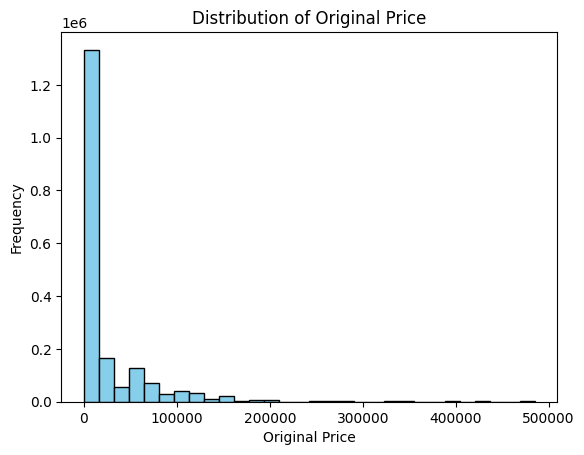

In [135]:
import matplotlib.pyplot as plt

# 히스토그램 그리기
plt.hist(ggg_data['original_price'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Original Price')
plt.ylabel('Frequency')
plt.title('Distribution of Original Price')
plt.show()


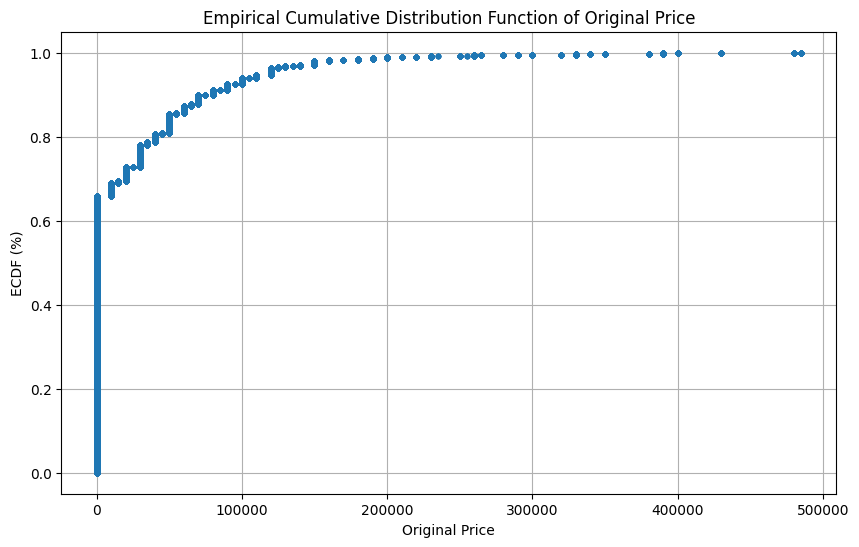

In [136]:
import numpy as np
import matplotlib.pyplot as plt

# 누적 분포 함수 (ECDF) 정의
def ecdf(data):
    n = len(data)
    x = np.sort(data)
    y = np.arange(1, n+1) / n
    return x, y

# 'original_price' 데이터 추출
original_price_data = ggg_data['original_price'].dropna()

# ECDF 계산
x, y = ecdf(original_price_data)

# 시각화
plt.figure(figsize=(10, 6))
plt.plot(x, y, marker='.', linestyle='none')
plt.xlabel('Original Price')
plt.ylabel('ECDF (%)')
plt.title('Empirical Cumulative Distribution Function of Original Price')
plt.grid(True)
plt.show()

In [137]:
ggg_data

,performance_code,price,discount_type,per,perc,discount_rate,original_price,grade
0,302,10000,일반,0,0,0.0,10000,B
1,1120,0,초대권,0,0,0.0,0,0
2,2283,0,초대권,0,0,0.0,0,0
3,2798,0,초대권,0,0,0.0,0,0
4,897,180000,일반,0,0,0.0,180000,R
...,...,...,...,...,...,...,...,...
1920863,1265,0,초대권,0,0,0.0,0,0
1920864,313,21000,청소년(만7세~만24세/본인만)30%,1,30,0.3,35000,0
1920865,736,24000,그린회원 할인20%,1,20,0.2,30000,0
1920866,1920,0,초대권,0,0,0.0,0,0


# 원가 (0원 포함 버전)

### 스케일링&원가 합치기 / 나이성별 drop

In [201]:
## original_price 

import pandas as pd
datao = ggg_data.copy()

In [202]:
datao['original_price'].isnull()

0          False
1          False
2          False
3          False
4          False
           ...  
1920863    False
1920864    False
1920865    False
1920866    False
1920867    False
Name: original_price, Length: 1920868, dtype: bool

In [203]:
# 0을 결측값으로 바꾸기
datao['original_price'].replace(0, None, inplace=True)

In [204]:
datao['original_price'].isnull().sum()
#datao['original_price'].to_csv("원가 열.csv")
datao['original_price']

1267095

In [207]:
datao

,performance_code,price,discount_type,per,perc,discount_rate,original_price,grade
0,302,10000,일반,0,0,0.0,10000,B
1,1120,0,초대권,0,0,0.0,None,0
2,2283,0,초대권,0,0,0.0,None,0
3,2798,0,초대권,0,0,0.0,None,0
4,897,180000,일반,0,0,0.0,180000,R
...,...,...,...,...,...,...,...,...
1920863,1265,0,초대권,0,0,0.0,None,0
1920864,313,21000,청소년(만7세~만24세/본인만)30%,1,30,0.3,35000,0
1920865,736,24000,그린회원 할인20%,1,20,0.2,30000,0
1920866,1920,0,초대권,0,0,0.0,None,0


In [208]:
data = datao[['performance_code','price','discount_type','original_price']]

In [209]:
data['place'] = df['place']
data

,performance_code,price,discount_type,original_price,place
0,302,10000,일반,10000,콘서트홀
1,1120,0,초대권,None,리사이틀홀
2,2283,0,초대권,None,IBK챔버홀
3,2798,0,초대권,None,리사이틀홀
4,897,180000,일반,180000,콘서트홀
...,...,...,...,...,...
1920863,1265,0,초대권,None,IBK챔버홀
1920864,313,21000,청소년(만7세~만24세/본인만)30%,35000,콘서트홀
1920865,736,24000,그린회원 할인20%,30000,리사이틀홀
1920866,1920,0,초대권,None,IBK챔버홀


In [210]:
## 좌석 등급 떼오기
import pandas as pd
datas = con_g.copy()

data['s_grade'] = datas['grade']

# original_price 작업

In [214]:
# place = IBK챔버홀만 떼오기    # 477410 rows

ibk_d = data[data['place'] == 'IBK챔버홀']
ibk_d

,performance_code,price,discount_type,original_price,place,s_grade
2,2283,0,초대권,None,IBK챔버홀,R
8,1631,56000,골드회원 할인20%,70000,IBK챔버홀,R
10,2339,0,기획사,None,IBK챔버홀,S
12,2625,0,기획사판매,None,IBK챔버홀,R
21,1758,0,기획사판매,None,IBK챔버홀,R
...,...,...,...,...,...,...
1920860,49,15000,블라인드티켓 할인(1인4매)50%,30000,IBK챔버홀,R
1920861,1536,0,기획사판매,None,IBK챔버홀,R
1920863,1265,0,초대권,None,IBK챔버홀,R
1920866,1920,0,초대권,None,IBK챔버홀,R


In [215]:
# 결측값들 갯수 파악
ibk_d['original_price'].isnull().sum()

366735

In [216]:
## 0원인 행들 -> original = 0원   # 363072 rows

ibk_d[ibk_d['price'] == 0]
ibk_d[ibk_d['price'] == 0]['discount_type'].unique()

array(['초대권', '기획사', '기획사판매', '공연진행석', '홍보진행', '기획사 할인50%', '기획사 20%',
       '일반판매석', '연주자할인30%', '기획사 판매20%', '기획사판매20%', '［초대권］', '홍보진행석',
       '차액'], dtype=object)

In [217]:
ibk_d.loc[ibk_d['price'] == 0, 'original_price'] = 0

In [218]:
# 결측값들 확인
ibk_d['original_price'].isnull().sum()

3663

In [219]:
ibk_d

,performance_code,price,discount_type,original_price,place,s_grade
2,2283,0,초대권,0,IBK챔버홀,R
8,1631,56000,골드회원 할인20%,70000,IBK챔버홀,R
10,2339,0,기획사,0,IBK챔버홀,S
12,2625,0,기획사판매,0,IBK챔버홀,R
21,1758,0,기획사판매,0,IBK챔버홀,R
...,...,...,...,...,...,...
1920860,49,15000,블라인드티켓 할인(1인4매)50%,30000,IBK챔버홀,R
1920861,1536,0,기획사판매,0,IBK챔버홀,R
1920863,1265,0,초대권,0,IBK챔버홀,R
1920866,1920,0,초대권,0,IBK챔버홀,R


In [221]:
fin23 = ggg_data.copy()
fin23[fin23['original_price'] > 200000]

fin23 = fin23.drop(fin23[fin23['original_price'] > 200000].index)
fin23

fin_og = pd.DataFrame({'original_price': fin23['original_price']})
fin_og

,original_price
0,10000
1,0
2,0
3,0
4,180000
...,...
1920863,0
1920864,35000
1920865,30000
1920866,0


In [222]:
# 결측값 => 0원 처리
fin_og['original_price'].fillna(0, inplace=True)
fin_og['original_price'].unique()

array([ 10000,      0, 180000,  70000,  75000,  30000,  20000, 120000,
       130000,  65000, 110000,  90000,  50000,  40000, 100000,  35000,
       150000, 125000,  60000,  80000,  55000,  45000, 200000,  15000,
       160000, 170000, 190000, 140000, 135000,  85000,  25000,  95000,
       105000])

In [223]:
## 가져오기 

d23= !!! 스케일링 데이터프레임 복사하기

In [224]:
dd23= d23.copy()

In [225]:
## 나이성별원가 빼기
dd23 = dd23.drop(columns=['age', 'gender','original_price'])

dd23

,ticket_cancel,place,intermission,무료,그린,블루,골드,싹틔우미,노블,seat_Token,time_category,encoded_genre,date_difference,tokenized_discount,discount_type_count,day_of_week,running_time,is_holiday,corona_reg
0,2,1,0.5,1,1,0,1,0,0,4,3,2,0.000000,4,0.407407,5,0.206897,0,1
1,0,2,0.5,0,0,0,0,0,0,3,3,4,0.019608,1,0.185185,6,0.103448,1,6
2,0,3,0.5,0,0,0,0,0,0,1,3,4,0.042017,1,0.407407,6,0.068966,0,0
3,0,2,0.5,0,0,0,0,0,0,3,3,4,0.000000,1,0.222222,3,0.103448,0,0
4,0,1,0.0,1,0,0,0,0,0,1,3,4,0.030812,4,0.296296,3,0.103448,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1920863,0,3,0.5,0,0,0,0,0,0,1,2,8,0.000000,1,0.222222,6,0.137931,0,0
1920864,0,1,0.0,1,0,0,0,1,0,4,2,2,0.184874,2,0.481481,6,0.206897,0,0
1920865,0,2,0.5,1,1,1,0,0,0,3,3,4,0.019608,2,0.259259,6,0.137931,0,3
1920866,0,3,0.5,0,0,0,0,0,0,1,3,4,0.000000,1,0.444444,6,0.103448,0,1


In [226]:
# fin_og['original_price']를 붙이기
dd23['original_price'] = fin_og['original_price']
dd23

,ticket_cancel,place,intermission,무료,그린,블루,골드,싹틔우미,노블,seat_Token,time_category,encoded_genre,date_difference,tokenized_discount,discount_type_count,day_of_week,running_time,is_holiday,corona_reg,original_price
0,2,1,0.5,1,1,0,1,0,0,4,3,2,0.000000,4,0.407407,5,0.206897,0,1,10000.0
1,0,2,0.5,0,0,0,0,0,0,3,3,4,0.019608,1,0.185185,6,0.103448,1,6,0.0
2,0,3,0.5,0,0,0,0,0,0,1,3,4,0.042017,1,0.407407,6,0.068966,0,0,0.0
3,0,2,0.5,0,0,0,0,0,0,3,3,4,0.000000,1,0.222222,3,0.103448,0,0,0.0
4,0,1,0.0,1,0,0,0,0,0,1,3,4,0.030812,4,0.296296,3,0.103448,0,1,180000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1920863,0,3,0.5,0,0,0,0,0,0,1,2,8,0.000000,1,0.222222,6,0.137931,0,0,0.0
1920864,0,1,0.0,1,0,0,0,1,0,4,2,2,0.184874,2,0.481481,6,0.206897,0,0,35000.0
1920865,0,2,0.5,1,1,1,0,0,0,3,3,4,0.019608,2,0.259259,6,0.137931,0,3,30000.0
1920866,0,3,0.5,0,0,0,0,0,0,1,3,4,0.000000,1,0.444444,6,0.103448,0,1,0.0


In [227]:
##  original_price 결측값인 행들 빼기
dd23[dd23['original_price'].isnull()]

,ticket_cancel,place,intermission,무료,그린,블루,골드,싹틔우미,노블,seat_Token,time_category,encoded_genre,date_difference,tokenized_discount,discount_type_count,day_of_week,running_time,is_holiday,corona_reg,original_price
58,2,1,0.666667,1,1,0,0,0,0,3,2,2,0.000000,2,0.555556,7,0.172414,0,0,NaN
298,2,1,0.500000,1,1,0,0,1,0,3,2,2,0.014006,3,0.518519,3,0.172414,0,0,NaN
566,2,1,0.666667,1,1,1,1,0,0,1,3,2,0.148459,2,0.518519,3,0.172414,0,0,NaN
1018,2,1,0.500000,1,0,0,0,1,0,2,3,2,0.033613,4,0.555556,4,0.172414,0,0,NaN
1064,0,1,0.000000,1,0,0,1,0,0,3,3,2,0.280112,2,0.370370,5,0.137931,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1920068,0,1,0.000000,1,0,1,1,0,1,1,3,2,0.070028,3,0.555556,2,0.206897,0,0,NaN
1920368,0,1,0.666667,1,1,0,0,0,0,3,2,2,0.000000,6,0.555556,7,0.172414,0,0,NaN
1920398,2,1,0.500000,1,0,0,1,0,0,2,3,2,0.033613,2,0.555556,4,0.172414,0,0,NaN
1920456,0,1,0.000000,1,0,0,0,1,0,3,3,2,0.072829,3,0.555556,3,0.206897,0,0,NaN


In [228]:
#드롭
dd23 = dd23.dropna(subset=['original_price'])
dd23

,ticket_cancel,place,intermission,무료,그린,블루,골드,싹틔우미,노블,seat_Token,time_category,encoded_genre,date_difference,tokenized_discount,discount_type_count,day_of_week,running_time,is_holiday,corona_reg,original_price
0,2,1,0.5,1,1,0,1,0,0,4,3,2,0.000000,4,0.407407,5,0.206897,0,1,10000.0
1,0,2,0.5,0,0,0,0,0,0,3,3,4,0.019608,1,0.185185,6,0.103448,1,6,0.0
2,0,3,0.5,0,0,0,0,0,0,1,3,4,0.042017,1,0.407407,6,0.068966,0,0,0.0
3,0,2,0.5,0,0,0,0,0,0,3,3,4,0.000000,1,0.222222,3,0.103448,0,0,0.0
4,0,1,0.0,1,0,0,0,0,0,1,3,4,0.030812,4,0.296296,3,0.103448,0,1,180000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1920863,0,3,0.5,0,0,0,0,0,0,1,2,8,0.000000,1,0.222222,6,0.137931,0,0,0.0
1920864,0,1,0.0,1,0,0,0,1,0,4,2,2,0.184874,2,0.481481,6,0.206897,0,0,35000.0
1920865,0,2,0.5,1,1,1,0,0,0,3,3,4,0.019608,2,0.259259,6,0.137931,0,3,30000.0
1920866,0,3,0.5,0,0,0,0,0,0,1,3,4,0.000000,1,0.444444,6,0.103448,0,1,0.0


In [229]:
# 스케일링

# 스케일링
from sklearn.preprocessing import MinMaxScaler

# 스케일러 생성
scaler = MinMaxScaler()

# 스케일링할 열 선택
columns_to_scale = ['original_price']

# 선택한 열에 대해 스케일링 수행
dd23[columns_to_scale] = scaler.fit_transform(dd23[columns_to_scale])


In [230]:
dd23

,ticket_cancel,place,intermission,무료,그린,블루,골드,싹틔우미,노블,seat_Token,time_category,encoded_genre,date_difference,tokenized_discount,discount_type_count,day_of_week,running_time,is_holiday,corona_reg,original_price
0,2,1,0.5,1,1,0,1,0,0,4,3,2,0.000000,4,0.407407,5,0.206897,0,1,0.050
1,0,2,0.5,0,0,0,0,0,0,3,3,4,0.019608,1,0.185185,6,0.103448,1,6,0.000
2,0,3,0.5,0,0,0,0,0,0,1,3,4,0.042017,1,0.407407,6,0.068966,0,0,0.000
3,0,2,0.5,0,0,0,0,0,0,3,3,4,0.000000,1,0.222222,3,0.103448,0,0,0.000
4,0,1,0.0,1,0,0,0,0,0,1,3,4,0.030812,4,0.296296,3,0.103448,0,1,0.900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1920863,0,3,0.5,0,0,0,0,0,0,1,2,8,0.000000,1,0.222222,6,0.137931,0,0,0.000
1920864,0,1,0.0,1,0,0,0,1,0,4,2,2,0.184874,2,0.481481,6,0.206897,0,0,0.175
1920865,0,2,0.5,1,1,1,0,0,0,3,3,4,0.019608,2,0.259259,6,0.137931,0,3,0.150
1920866,0,3,0.5,0,0,0,0,0,0,1,3,4,0.000000,1,0.444444,6,0.103448,0,1,0.000


In [231]:
dd23.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1902433 entries, 0 to 1920867
Data columns (total 20 columns):
 #   Column               Dtype  
---  ------               -----  
 0   ticket_cancel        int64  
 1   place                int64  
 2   intermission         float64
 3   무료                   int64  
 4   그린                   int64  
 5   블루                   int64  
 6   골드                   int64  
 7   싹틔우미                 int64  
 8   노블                   int64  
 9   seat_Token           int64  
 10  time_category        int64  
 11  encoded_genre        int64  
 12  date_difference      float64
 13  tokenized_discount   int64  
 14  discount_type_count  float64
 15  day_of_week          int64  
 16  running_time         float64
 17  is_holiday           int64  
 18  corona_reg           int64  
 19  original_price       float64
dtypes: float64(5), int64(15)
memory usage: 304.8 MB


In [232]:
# 저장본
#dd23.to_csv("최종본_스케일링.csv", index=False)
dd23['original_price'].nunique() # 가격 종류 => 33가지

In [234]:
# 200000 넘는 애들 몇명   18435개
ggg_data[ggg_data['original_price'] > 200000]

,performance_code,price,discount_type,per,perc,discount_rate,original_price,grade
58,863,285000,그린회원 할인5%,1,5,0.05,300000,0
298,2803,126000,싹틔우미 할인40%,1,40,0.40,210000,0
566,2536,297000,골드회원 할인10%,1,10,0.10,330000,0
1018,145,390000,일반,0,0,0.00,390000,S
1064,44,289000,골드회원 할인15%,1,15,0.15,340000,0
...,...,...,...,...,...,...,...,...
1920068,2084,198000,노블회원 할인40%,1,40,0.40,330000,0
1920368,863,150000,"유족증(국가유공자,의사자/본인만)50%",1,50,0.50,300000,0
1920398,145,351000,골드회원 할인10%,1,10,0.10,390000,0
1920456,2085,138000,싹틔우미 할인40%,1,40,0.40,230000,0


In [235]:
## 200000넘는 애들 날리기   잔여 : 1902433개 
dae= ggg_data.copy()
dae = dae.drop(dae[dae['original_price'] > 200000].index)
dae

,performance_code,price,discount_type,per,perc,discount_rate,original_price,grade
0,302,10000,일반,0,0,0.0,10000,B
1,1120,0,초대권,0,0,0.0,0,0
2,2283,0,초대권,0,0,0.0,0,0
3,2798,0,초대권,0,0,0.0,0,0
4,897,180000,일반,0,0,0.0,180000,R
...,...,...,...,...,...,...,...,...
1920863,1265,0,초대권,0,0,0.0,0,0
1920864,313,21000,청소년(만7세~만24세/본인만)30%,1,30,0.3,35000,0
1920865,736,24000,그린회원 할인20%,1,20,0.2,30000,0
1920866,1920,0,초대권,0,0,0.0,0,0


In [236]:
count_price_over_300000 = len(ggg_data[ggg_data['original_price'] > 200000])  # 18435 행
print(count_price_over_300000)

18435


In [238]:
ggg_data[ggg_data['original_price'] == 1000]

,performance_code,price,discount_type,per,perc,discount_rate,original_price,grade


In [240]:
# price, perc df 만들기
n = datao[['price','perc','original_price']]
n

,price,perc,original_price
0,10000,0,10000
1,0,0,None
2,0,0,None
3,0,0,None
4,180000,0,180000
...,...,...,...
1920863,0,0,None
1920864,21000,30,35000
1920865,24000,20,30000
1920866,0,0,None


## 군집화

In [ ]:
data2 = !!!! ['reservation_rate'] 포함된 데이터프레임 받기

In [241]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# 'reservation_rate' 열만 추출하여 새로운 데이터프레임 생성
reservation_rates = data2['reservation_rate'].values.reshape(-1, 1)

# K-means 모델 생성 및 학습
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(reservation_rates)

# 군집 할당 결과 확인
cluster_labels = kmeans.labels_

# 원본 데이터에 군집 할당 결과 추가
data2['cluster_labels'] = cluster_labels

# 각 군집별 'reservation_rate' 값 추출
cluster_0_rates = data2[data2['cluster_labels'] == 0]['reservation_rate']
cluster_1_rates = data2[data2['cluster_labels'] == 1]['reservation_rate']
cluster_2_rates = data2[data2['cluster_labels'] == 2]['reservation_rate']

# 박스플롯 그리기
plt.figure(figsize=(8, 6))
plt.boxplot([cluster_0_rates, cluster_1_rates, cluster_2_rates], labels=['Cluster 0', 'Cluster 1', 'Cluster 2'])
plt.xlabel('Cluster')
plt.ylabel('Reservation Rate')
plt.title('Reservation Rate Distribution by Cluster')
plt.show()

NameError: name 'data2' is not defined

# 0번 집단

In [ ]:
import pandas as pd

data0 = !!! 0번 집단 
data0
data0.info()

In [ ]:

# 캔슬여부 열 기존의 것 새로 가져와서 갈아끼기
datac = df.copy()

data0['ticket_cancel'] = datac['ticket_cancel']
data0
data0['price']
## 스케일링
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
scaler = MinMaxScaler()

# 스케일링할 열 선택
columns_to_scale = ['corona_infected', 'discount_type_count', 'intermission', 'date_difference', 'price']

# 선택한 열들에 대해 Min-Max 스케일링 수행
data0[columns_to_scale] = scaler.fit_transform(data0[columns_to_scale])
data0.info()

data00= data0.copy()

## 예매율 떼기 ..
data00 = data00.drop('reservation_rate', axis=1)
data00.info()
#data00.to_csv("취소표 관련 데이터(러닝타임_스케일링x).csv", index=False)
# 기존 취소 확률 파악
data00['ticket_cancel'].value_counts()
data00['discount_rate'].value_counts()
# 100의 값을 1로 바꾸기
data00['discount_rate'] = data00['discount_rate'].replace(1, 0)
data00['discount_rate'].value_counts()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from imblearn.over_sampling import RandomOverSampler

# 원본 데이터의 복사본 생성
data_1 = data00.copy()

# 'ticket_cancel' 열을 타겟 변수로 설정하고 나머지 열들은 피처로 설정합니다.
X = data_1.drop('ticket_cancel', axis=1)
y = data_1['ticket_cancel']

# 데이터를 학습 세트와 테스트 세트로 분리합니다.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 오버샘플링 객체 생성 및 적용
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

# 랜덤 포레스트 모델 객체를 생성하고 학습 세트에 대해 학습시킵니다.
model = RandomForestClassifier(random_state=42)
model.fit(X_resampled, y_resampled)

# 테스트 세트에 대한 예측을 수행합니다.
y_pred = model.predict(X_test)

# 정확도를 계산하고 출력합니다.
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# 혼동 행렬을 출력합니다.
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# 가격 조정

## 0집단 내에서 구간 파악

In [ ]:
# 5개로 쪼개 -> 할인율 분포 보기 
datad = data0.copy()
datad
datad['ticket_cancel'].unique()
datad
datad['discount_rate'].unique()
#### import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 'discount_rate'에서 0이 아닌 행만 선택합니다.
datad_nonzero = datad[datad['discount_rate'] != 0]

# 'discount_rate'을 오름차순으로 정렬합니다.
datad_sorted = datad_nonzero.sort_values('discount_rate')

# 전체 행을 5등분합니다. 중복된 bin edges는 무시합니다.
datad_sorted['quantile'] = pd.qcut(datad_sorted['discount_rate'], 5, duplicates='drop')

# 각 구간에 속하는 행의 개수를 출력합니다.
print(datad_sorted['quantile'].value_counts().sort_index())

# 박스 플롯을 생성합니다.
plt.figure(figsize=(10,6))
sns.boxplot(x='quantile', y='discount_rate', data=datad_sorted)
plt.xticks(rotation=90)
plt.title('Distribution of discount rate across quantiles')
plt.show()
import pandas as pd

# 'discount_rate'에서 구간을 나눕니다.
bins = [0, 0.05, 0.15, 0.3, 0.4, 0.8]
labels = ['1구간', '2구간', '3구간', '4구간', '5구간']
datad['quantile'] = pd.cut(datad['discount_rate'], bins=bins, labels=labels, include_lowest=True)

# 각 구간에 속하는 행의 개수를 출력합니다.
counts = datad["quantile"].value_counts().sort_index()

for i in range(len(counts)):
    print(f"{counts.index[i]} (실제 값: ({bins[i]}, {bins[i+1]})): {counts[counts.index[i]]}개")

In [ ]:
import pandas as pd

# 'discount_rate'에서 구간을 나눕니다.
bins = [0, 0.05, 0.15, 0.3, 0.4, 0.8]
labels = ['1', '2', '3', '4', '5']
datad['discount_rate_quantile'] = pd.cut(datad['discount_rate'], bins=bins, labels=labels, include_lowest=True)

In [ ]:
import matplotlib.pyplot as plt

# 'discount_rate'를 퍼센트로 변환합니다.
datad['discount_rate'] = datad['discount_rate'] * 100

# 각 구간별 할인율을 꺾은선 그래프로 표시합니다.
plt.figure(figsize=(10,6))
plt.plot(datad['discount_rate_quantile'], datad['discount_rate'], marker='o')

plt.xlabel('Discount Rate Quantiles')
plt.ylabel('Discount Rate (%)')
plt.title('Discount Rate per Quantile')

# x축의 범위를 설정합니다.
plt.xlim(-0.5, len(datad['discount_rate_quantile'].unique())-0.5)

plt.grid(True)
plt.show()

## 머신러닝

In [ ]:
data_p=datad.copy()
data_pp = data2.copy()
data_p['price'] = data_pp['price']

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split

# 피처와 타깃 변수 설정
X = datad.drop(['ticket_cancel', 'discount_rate_quantile', 'quantile'], axis=1)
y = datad['ticket_cancel']

# 데이터 분할: 학습 데이터셋과 테스트 데이터셋으로 나눕니다.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델 생성 및 학습
model_gb_new = GradientBoostingClassifier(random_state=42)
model_gb_new.fit(X_train, y_train)

# 성능 평가: 정확도를 출력합니다.
print("Training Accuracy: ", model_gb_new.score(X_train, y_train))
print("Testing Accuracy: ", model_gb_new.score(X_test, y_test))

In [ ]:
# 1. 각 구간별로 데이터를 분리합니다.
quantiles = datad['discount_rate_quantile'].unique()
data_by_quantile = {quantile: data_p[data_p['discount_rate_quantile'] == quantile] for quantile in quantiles}

print(f"Number of rows per quantile: {[len(data) for data in data_by_quantile.values()]}")  # 각 구간별 행의 수 출력

increase_percent = 0.05   # 변경할 비율 설정 (예: 5%)

for quantile, data in data_by_quantile.items():
    print(f"Processing {quantile}...")   # 현재 처리 중인 구간 출력

    # 원본 데이터 복사
    data_copy = data.copy()

    # discount_rate를 일정 퍼센트 증가시킵니다.
    original_discount_rates = data_copy['discount_rate'].copy()   # 원래 할인율 저장
    data_copy['discount_rate'] *= (1 + increase_percent)

    print(f"Discount rate changed by {increase_percent * 100}% : {np.any(original_discount_rates != data_copy['discount_rate'])}")   # 할인율 변경 여부 출력
    
    # 새로운 ticket_cancel 값을 예측합니다.
    X_predictors = data_copy.drop(['ticket_cancel', 'discount_rate_quantile', 'quantile'], axis=1)
    new_ticket_cancels = model_gb_new.predict(X_predictors)
    
    # 원래 ticket_cancel 값이 1인데 예측값이 0으로 바뀌는 경우의 price 값을 가져옵니다.
    increased_revenue_scaled = data_copy['price'][(data_copy['ticket_cancel'] == 1) & (new_ticket_cancels == 0)]

    # 이제 스케일링된 가격들을 합산합니다.
    total_increased_revenue_scaled = np.sum(increased_revenue_scaled)

    print(f"Increased revenue for {quantile}: {total_increased_revenue_scaled}")



In [ ]:
# 실제 매출값
real=data_p.copy()
real

In [ ]:
# 'discount_rate_quantile' 값에 따라 데이터를 그룹화 하고 'ticket_cancel' 열의 값이 1인 행들의 가격('price')을 합산
real_cancelled = real[real['ticket_cancel'] == 1]
sum_price_by_quantile = real_cancelled.groupby('discount_rate_quantile')['price'].sum()

# 결과 출력
print(sum_price_by_quantile)

In [ ]:
# 5개로 쪼개 -> 할인율 분포 보기 
datad = data0.copy()
datad

,place,intermission,무료,그린,블루,골드,싹틔우미,노블,seat_Token,time_category,...,discount_type_count,day_of_week,running_time,is_holiday,corona_reg,price,reservation_rate,ticket_cancel,corona_infected,discount_rate
0,1,0.500000,1,1,0,1,0,0,4,3,...,0.407407,5,120,0,1,0.020833,29.780439,1,0.047984,0.0
11,1,0.500000,1,0,0,0,0,0,5,2,...,0.444444,7,120,0,0,0.050000,21.956088,0,0.000000,0.2
13,1,0.500000,0,0,0,0,0,0,3,3,...,0.370370,3,110,0,0,0.041667,33.093812,1,0.019311,0.0
21,3,0.500000,0,0,0,0,0,0,1,2,...,0.370370,6,100,0,2,0.000000,40.500000,0,0.001215,0.0
24,3,0.500000,0,0,0,0,0,0,1,3,...,0.111111,2,90,0,0,0.002083,32.000000,0,0.120748,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1919892,3,0.500000,0,0,0,0,0,0,1,3,...,0.333333,4,100,0,3,0.000000,34.833333,0,0.000000,0.0
1919894,1,0.666667,1,1,0,0,0,0,2,2,...,0.259259,7,110,0,3,0.187500,16.846307,0,0.035630,0.0
1919897,1,0.500000,0,0,0,0,0,0,1,3,...,0.407407,2,120,0,1,0.000000,32.255489,0,0.000000,0.3
1919901,3,0.500000,1,1,0,1,0,0,1,3,...,0.481481,3,100,0,0,0.031250,39.333333,0,0.001340,0.0


In [ ]:
datad['ticket_cancel'].unique()

array([1, 0])

In [ ]:
datad

,place,intermission,무료,그린,블루,골드,싹틔우미,노블,seat_Token,time_category,...,day_of_week,running_time,is_holiday,corona_reg,price,reservation_rate,ticket_cancel,corona_infected,discount_rate,quantile
0,1,0.500000,1,1,0,1,0,0,4,3,...,5,120,0,1,0.020833,29.780439,1,0.047984,0.0,NaN
11,1,0.500000,1,0,0,0,0,0,5,2,...,7,120,0,0,0.050000,21.956088,0,0.000000,0.2,3구간
13,1,0.500000,0,0,0,0,0,0,3,3,...,3,110,0,0,0.041667,33.093812,1,0.019311,0.0,NaN
21,3,0.500000,0,0,0,0,0,0,1,2,...,6,100,0,2,0.000000,40.500000,0,0.001215,0.0,NaN
24,3,0.500000,0,0,0,0,0,0,1,3,...,2,90,0,0,0.002083,32.000000,0,0.120748,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1919892,3,0.500000,0,0,0,0,0,0,1,3,...,4,100,0,3,0.000000,34.833333,0,0.000000,0.0,NaN
1919894,1,0.666667,1,1,0,0,0,0,2,2,...,7,110,0,3,0.187500,16.846307,0,0.035630,0.0,NaN
1919897,1,0.500000,0,0,0,0,0,0,1,3,...,2,120,0,1,0.000000,32.255489,0,0.000000,0.3,3구간
1919901,3,0.500000,1,1,0,1,0,0,1,3,...,3,100,0,0,0.031250,39.333333,0,0.001340,0.0,NaN


In [ ]:
datad['discount_rate'].unique()

array([0.  , 0.2 , 0.5 , 0.05, 0.3 , 0.15, 0.25, 0.1 , 0.4 , 0.12, 0.6 ,
       0.8 , 0.75, 0.35])

In [ ]:
#### import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 'discount_rate'에서 0이 아닌 행만 선택합니다.
datad_nonzero = datad[datad['discount_rate'] != 0]

# 'discount_rate'을 오름차순으로 정렬합니다.
datad_sorted = datad_nonzero.sort_values('discount_rate')

# 전체 행을 5등분합니다. 중복된 bin edges는 무시합니다.
datad_sorted['quantile'] = pd.qcut(datad_sorted['discount_rate'], 5, duplicates='drop')

# 각 구간에 속하는 행의 개수를 출력합니다.
print(datad_sorted['quantile'].value_counts().sort_index())

# 박스 플롯을 생성합니다.
plt.figure(figsize=(10,6))
sns.boxplot(x='quantile', y='discount_rate', data=datad_sorted)
plt.xticks(rotation=90)
plt.title('Distribution of discount rate across quantiles')
plt.show()

In [ ]:
import pandas as pd

# 'discount_rate'에서 구간을 나눕니다.
bins = [0, 0.05, 0.15, 0.3, 0.4, 0.8]
labels = ['1구간', '2구간', '3구간', '4구간', '5구간']
datad['quantile'] = pd.cut(datad['discount_rate'], bins=bins, labels=labels, include_lowest=True)

# 각 구간에 속하는 행의 개수를 출력합니다.
counts = datad["quantile"].value_counts().sort_index()

for i in range(len(counts)):
    print(f"{counts.index[i]} (실제 값: ({bins[i]}, {bins[i+1]})): {counts[counts.index[i]]}개")

1구간 (실제 값: (0, 0.05)): 378033개
2구간 (실제 값: (0.05, 0.15)): 28338개
3구간 (실제 값: (0.15, 0.3)): 33335개
4구간 (실제 값: (0.3, 0.4)): 9265개
5구간 (실제 값: (0.4, 0.8)): 16898개


In [ ]:
dr = data_p.copy()

In [ ]:
#데이터프레임 만들기

import pandas as pd

# 데이터 정의
data27 = {
    'quantile': [1, 2, 3, 4, 5],
    'real': [1394644000, 389892000, 368988000, 87354000, 188410000],
    'increased': [1246283000,93821000,154892000,40400000 ,69919000]
}

# 데이터프레임 생성
f_df = pd.DataFrame(data27)

f_df['sum']=f_df['real'] + f_df['increased']
# 출력
print(f_df)

In [ ]:
from matplotlib.ticker import FuncFormatter

# 함수 정의: 소수점 두 자리까지 표시
def billion_formatter(x, pos):
    return f'{x:.1f}B'

fig, axs = plt.subplots(5, figsize=(10,20))

pastel_blue = '#aec6cf'  # 파스텔 블루
pastel_pink = '#ffb3e6'  # 파스텔 핑크

for i in range(5):
    real_value = f_df['real'][i] / 1e8   # 값을 억 단위로 변환
    sum_value = f_df['sum'][i] / 1e8     # 값을 억 단위로 변환
    
    axs[i].bar(['Real'], [real_value], color=pastel_blue)
    axs[i].bar(['Sum'], [sum_value], color=pastel_pink)
    
    axs[i].set_title(f'Quantile {f_df["quantile"][i]}')
    
    # y축 값 포맷 설정
    formatter = FuncFormatter(billion_formatter)
    axs[i].yaxis.set_major_formatter(formatter)

    # 상승률 계산 및 표시하기 (선 그리기 및 텍스트 추가)
    increase_rate = (sum_value - real_value) / real_value * 100   # 증가율 계산 (%)
    axs[i].plot([0, 1], [real_value, sum_value], color='red')
    axs[i].text(0.5 , (real_value + sum_value) / 2 , f'{increase_rate:.2f}%', color='red', fontweight='bold')

plt.tight_layout()
plt.show()